# Noise Analysis
In thi notebook we test the effect of noisy inputs to the model.

In [1]:

%reload_ext autoreload
%autoreload 2

from torchvision import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import ast
import os
import sys
from statistics import mean
import torch
import warnings

# import modules from RN08 model
module_path = os.path.abspath(os.path.join('../../workspace/models/rn08/code/')) # or the path to your source code
sys.path.insert(0, module_path)
import rn08



## Utility methods

In [2]:
def plot_2d_heatmap(values, 
                    title, 
                    min_max=(0, 1), 
                    x_label='Layers', 
                    y_label='Layers', 
                    scale_label='Value', 
                    cmap='Greens',
                    show_value=True):
    '''
    Method used to plot a 2D heatmap using Seaborn.
    '''
    # Set up the figure and axes
    plt.figure(figsize=(7, 6))

    # Create a heatmap using Seaborn
    sns.heatmap(values, 
                cmap=cmap, 
                annot=show_value, 
                fmt=".2f", 
                vmin=min_max[0], 
                vmax=min_max[1],
                cbar_kws={'label': scale_label})

    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the plot
    plt.show()
    
def read_file(path):
    
    try:
        emd_file = open(path)
        emd_text = emd_file.read()
        emd_file.close()
        if not emd_text.startswith('['):
            return float(emd_text)
        emd = ast.literal_eval(emd_text)
        return emd[0]['AVG_EMD']
        
    except Exception as e:
        warnings.warn("Warning: " + path + " not found!")
        


In [3]:
# search space
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.0001, 0.00001, 0.000001, 0.0000001]
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [4]:
def get_emd(path, batch_size, learning_rate, precision, size, num_tests=3):
    EMDs = []

    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    for i in range(1, num_tests + 1):
        file_path = os.path.join(
            path, 
            f'bs{batch_size}_lr{lr}/ECON_{precision}b/{size}/{size}_emd_{i}.txt'
        )
        try:
            with open(file_path) as emd_file:
                emd_text = emd_file.read()
                emd_data = ast.literal_eval(emd_text)
                emd = emd_data[0]['AVG_EMD']
                EMDs.append(emd)
        except FileNotFoundError:
            continue
        except Exception as e:
            warnings.warn(f"An error occurred while processing {file_path}: {e}")
            continue
    
    if not EMDs:
        warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
        return -1
    
    return mean(EMDs)


def get_emd_with_noise(path, batch_size, learning_rate, precision, size, noise_type, percentage):
    '''
    Return the EMD achieved by the Model with a certain level of noise
    '''
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    file_path = os.path.join(
                path,
                f'bs{batch_size}_lr{lr}/' \
                f'ECON_{precision}b/{size}/emd_{noise_type}_{percentage}.txt'
        ) 
    noise_emd = -1
    try:
        emd_file = open(file_path)
        emd_text = emd_file.read()
        if not emd_text.startswith('['):
            noise_emd = float(emd_text)
        else:
            emd = ast.literal_eval(emd_text)
            noise_emd = emd[0]['AVG_EMD']
        emd_file.close()
    except Exception as e:
        # warnings.warn("Warning: " + file_path + " not found!")
        return -1
    return noise_emd

# ECON model (Autoencoder)
we focus our analysis on the encoder which will be deploy on an ASIC.

In [5]:
DATA_PATH = '/data/tbaldi/work/checkpoint/'
DATASET_DIR = '../../data/ECON/Elegun'
DATASET_FILE = 'nELinks5.npy'

size = 'baseline'

## EMD results

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: 

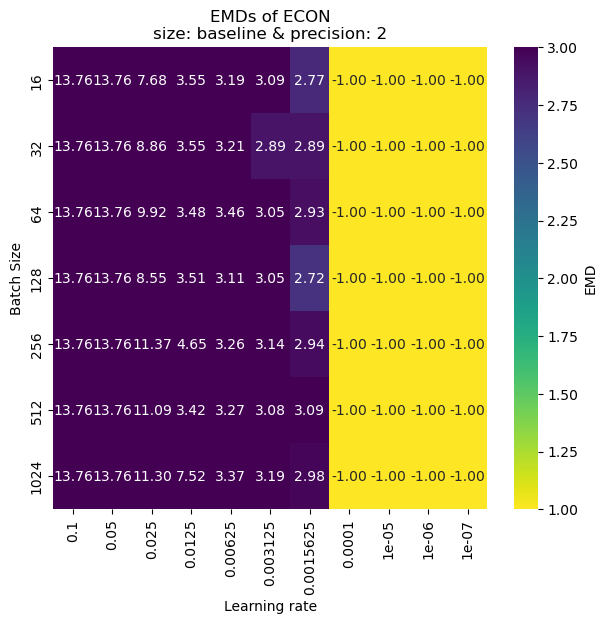

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


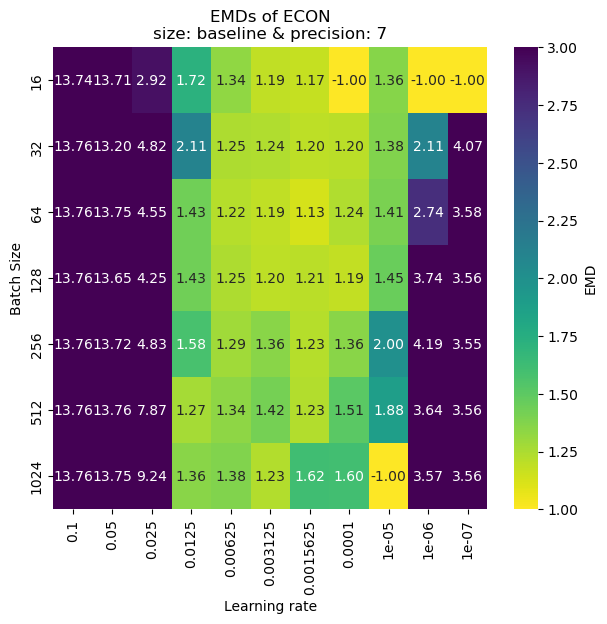

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


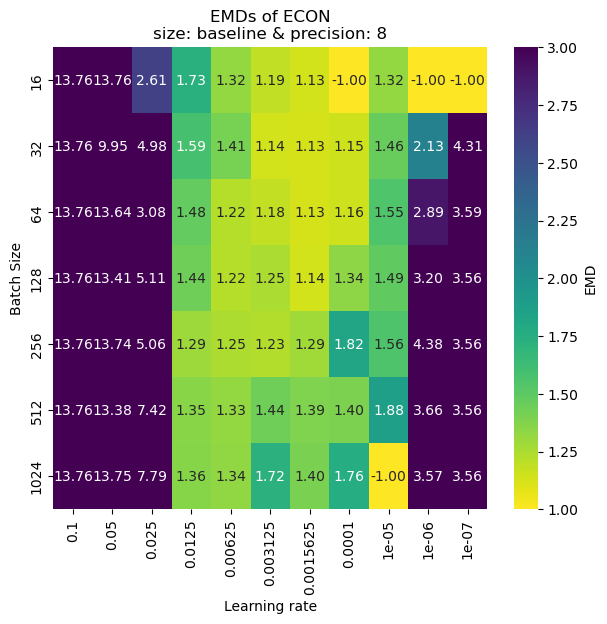

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


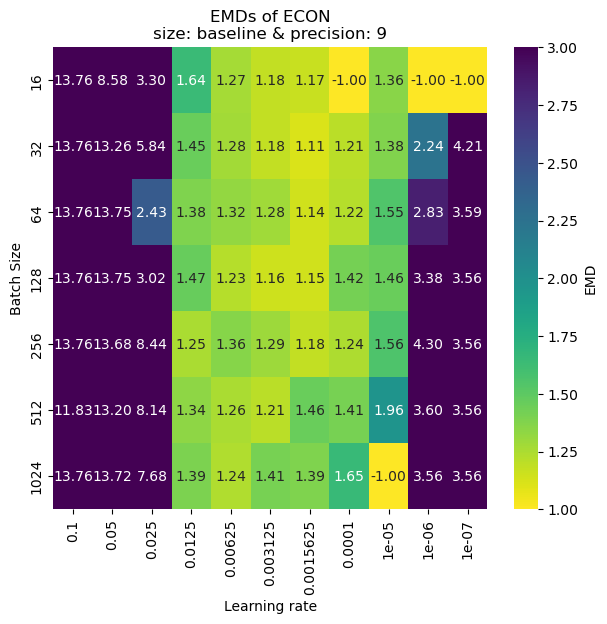

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


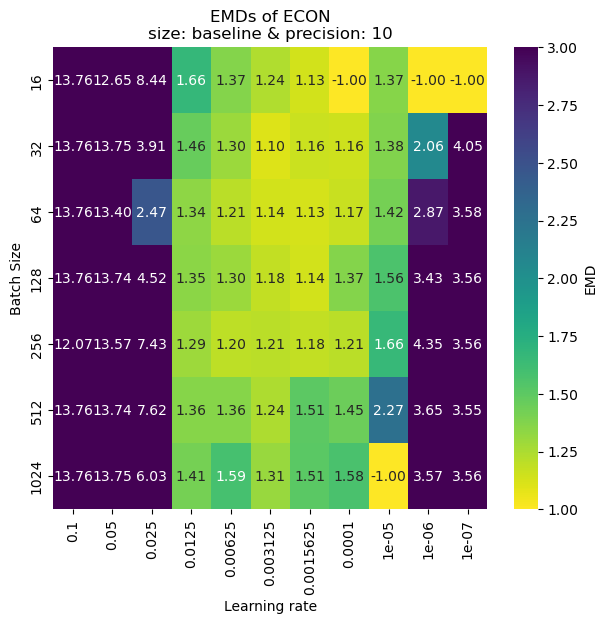

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


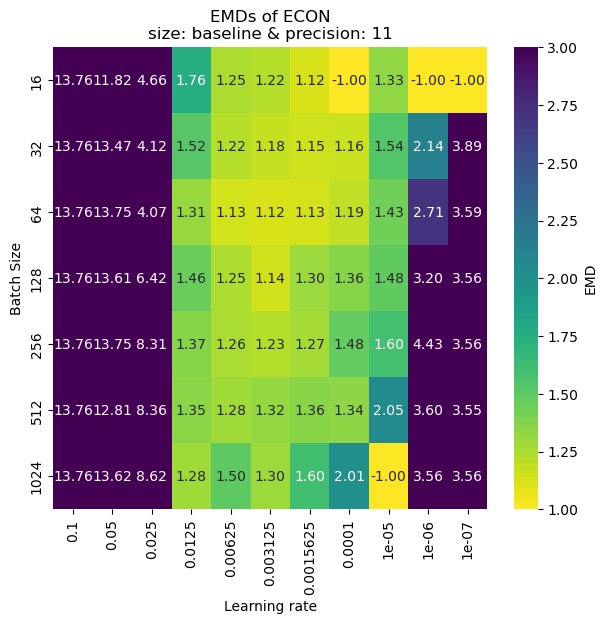

In [6]:
# plotting a heat map per layer
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            mean_EMD= get_emd(DATA_PATH, bs, lr, p, size)
            EMD_matrix[x, y] = mean_EMD
            
            
    EMD_matrix = pd.DataFrame(EMD_matrix, 
                              index=batch_sizes, 
                              columns=learning_rates)
    
    plot_2d_heatmap(EMD_matrix, 
                    f'EMDs of ECON\nsize: {size} & precision: {p}', 
                    (1, 3),
                    'Learning rate',
                    'Batch Size',
                    'EMD',
                    cmap='viridis_r')

Let's remove high learning rates from next analysis:

In [7]:
emd_distribution = []
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            mean_EMD = get_emd(DATA_PATH, bs, lr, p, size)
            EMD_matrix[x, y] = mean_EMD
            emd_distribution.append({
                'precision': p, 
                'EMD': mean_EMD,
                'batch_size': str(bs),
                'learning_rate': str(lr),
            })

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: 

In [8]:
emd_distribution_df = pd.DataFrame(emd_distribution)
emd_distribution_df = emd_distribution_df.sort_values(by='EMD', ascending=True)

## Scientific Benchmark

In [9]:
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
noise_type = 'gaussian'

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: 

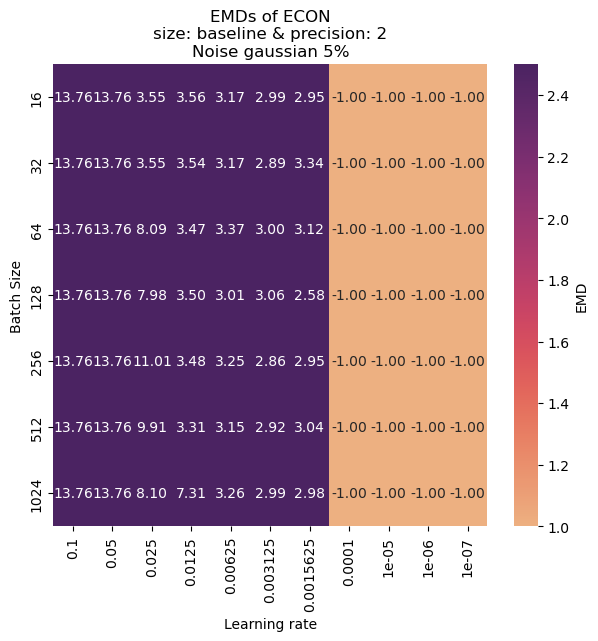

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


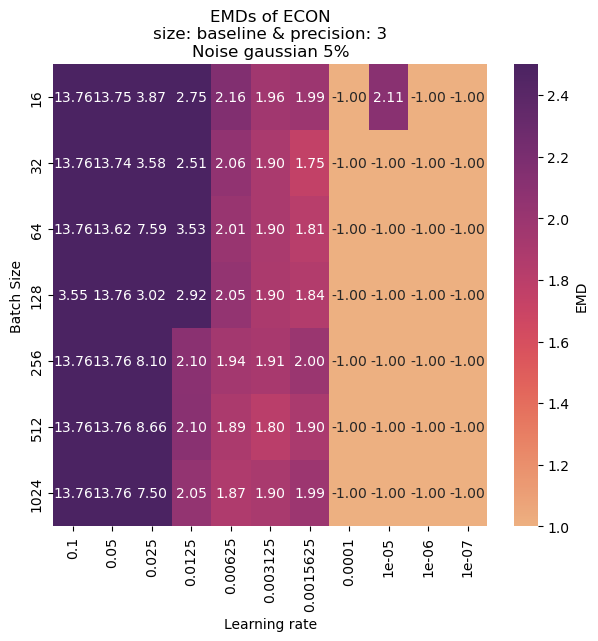

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


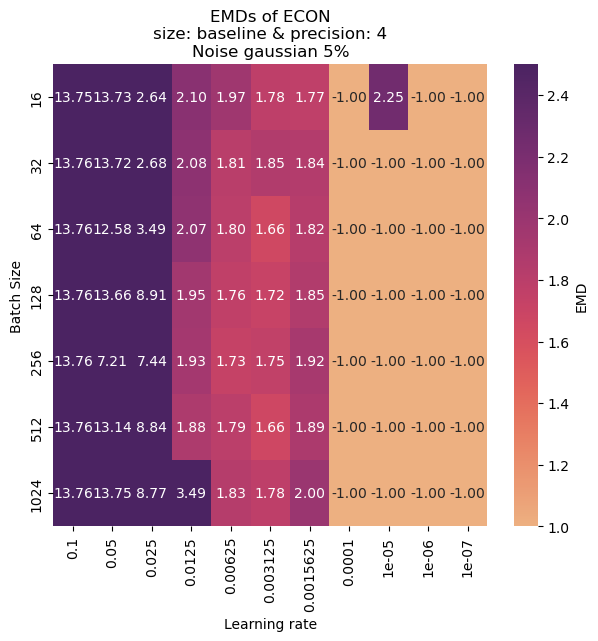

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


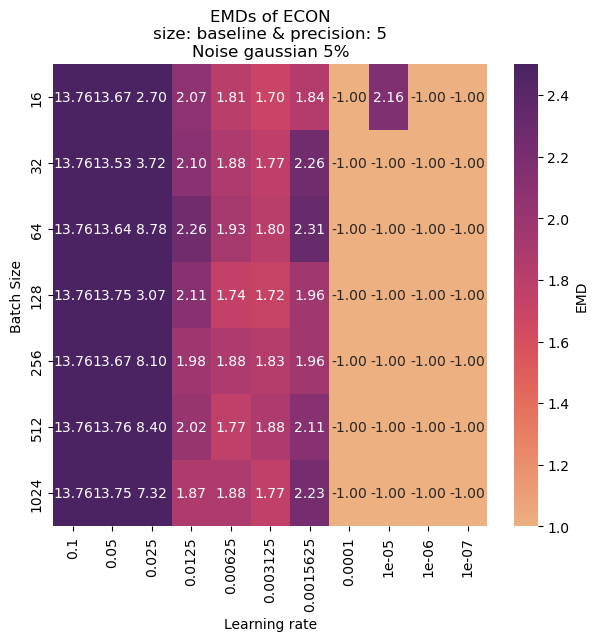

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


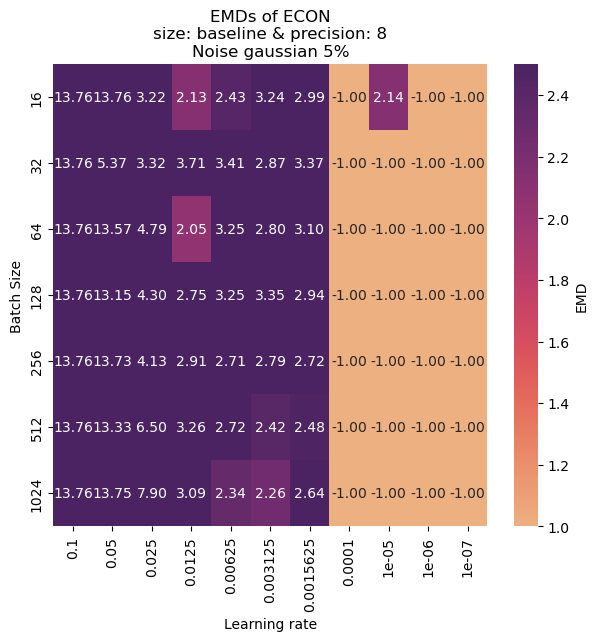

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


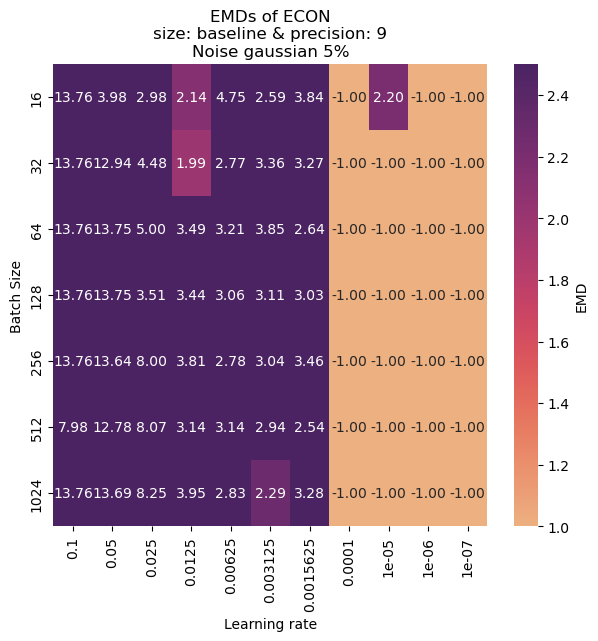

/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


In [10]:
emd_distribution = []
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            # get teh noise values
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            noise_emd_10 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 10)
            noise_emd_15 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 15)
            noise_emd_20 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 20)
            original_emd = get_emd(DATA_PATH, bs, lr, p, size)
            
            # build the matrix for the heatmap
            EMD_matrix[x, y] = noise_emd_5
            
            # store the values for the plots
            emd_distribution.append({
                'precision': p, 
                'emd': original_emd,
                # 'noise 5%': (noise_emd_5 - original_emd) * 100 / original_emd,
                # 'noise 10%': (noise_emd_10 - original_emd) * 100 / original_emd,
                # 'noise 15%': (noise_emd_15 - original_emd) * 100 / original_emd,
                # 'noise 20%': (noise_emd_20 - original_emd) * 100 / original_emd,
                'noise 5%': noise_emd_5,
                'noise 10%': noise_emd_10,
                'noise 15%': noise_emd_15,
                'noise 20%': noise_emd_20,
                'batch_size': str(bs),
                'learning_rate': str(lr),
                'precision': p,
            })
            
    # heat map of the EMD with noise as input per precision
    EMD_matrix = pd.DataFrame(EMD_matrix, 
                              index=batch_sizes, 
                              columns=learning_rates)
    
    plot_2d_heatmap(EMD_matrix, 
                    f'EMDs of ECON\nsize: {size} & precision: {p}\n' \
                    f'Noise {noise_type} 5%', 
                    (1, 2.5),
                    'Learning rate',
                    'Batch Size',
                    'EMD',
                    cmap='flare')
        

In [11]:
emd_distribution_df = pd.DataFrame(emd_distribution)
# export the CSV
emd_distribution_df.to_csv("./results/econ/noise.csv", index=False)

We want to plot the heatmap based on the precision, because the batch size is not correlated with the EMD and the noise.

--------------------------------------------------------------------------------


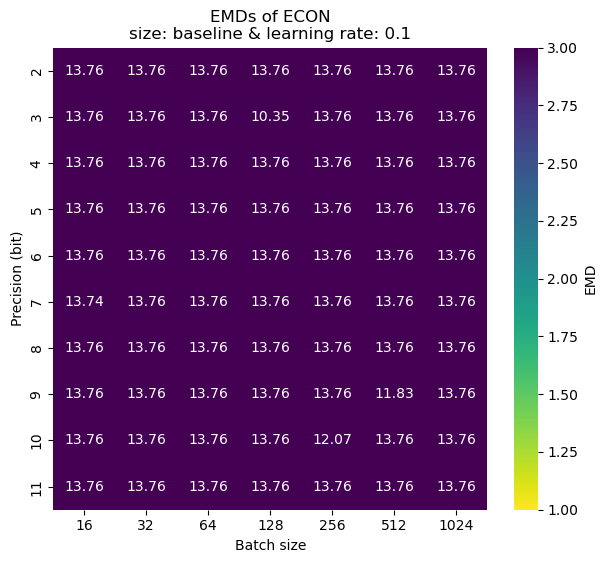

--------------------------------------------------------------------------------


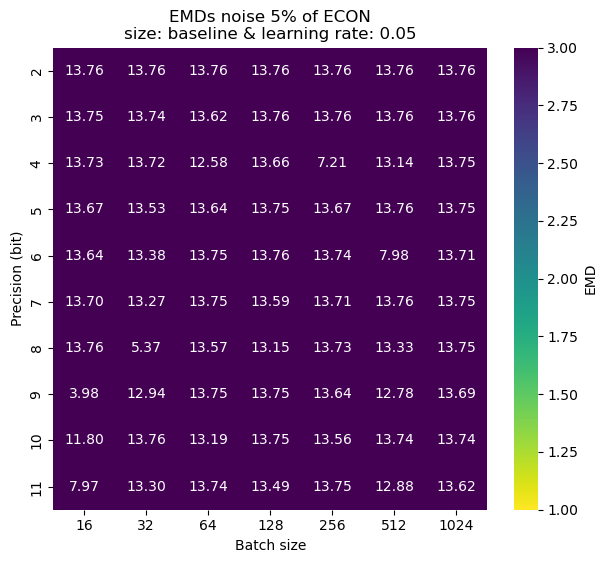

--------------------------------------------------------------------------------


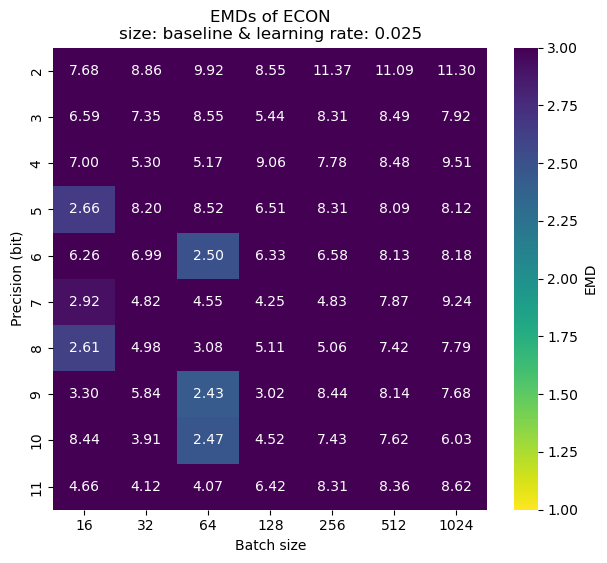

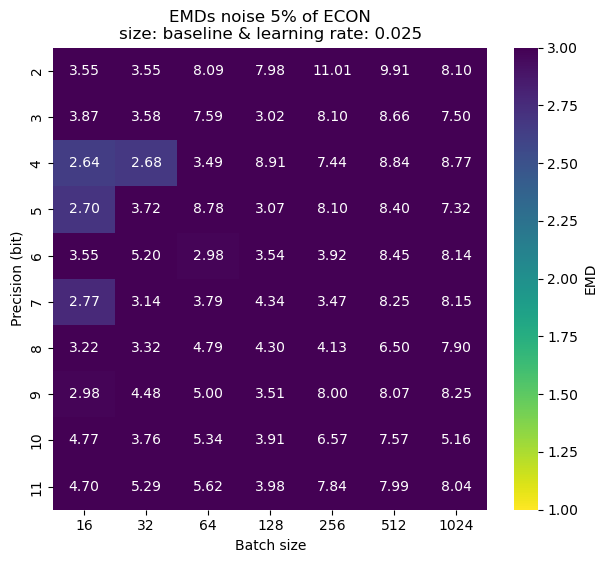

--------------------------------------------------------------------------------


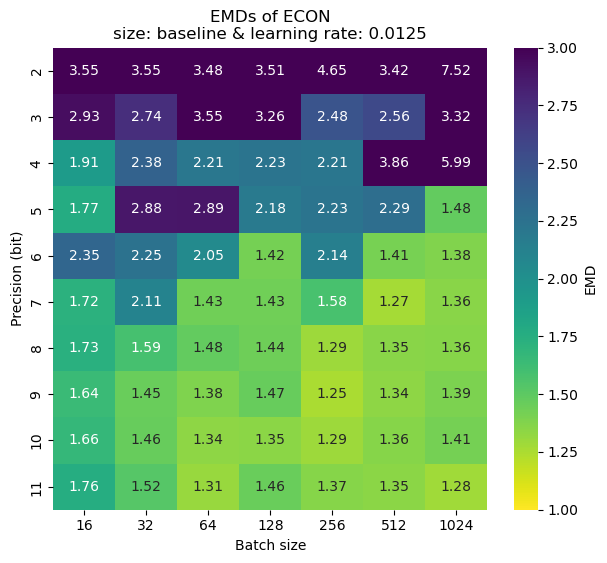

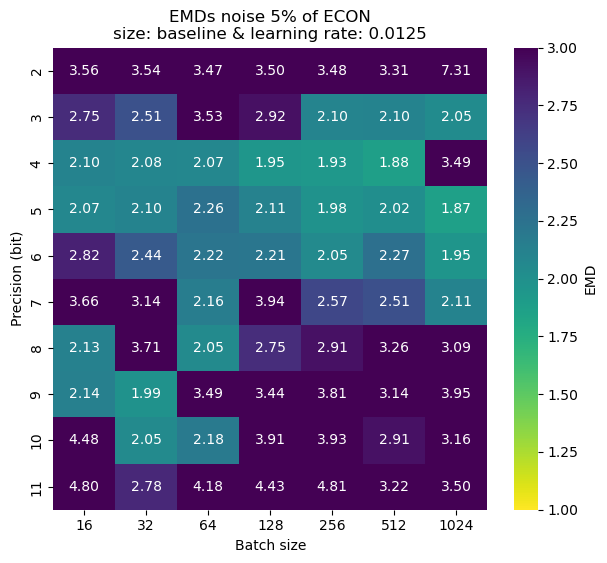

--------------------------------------------------------------------------------


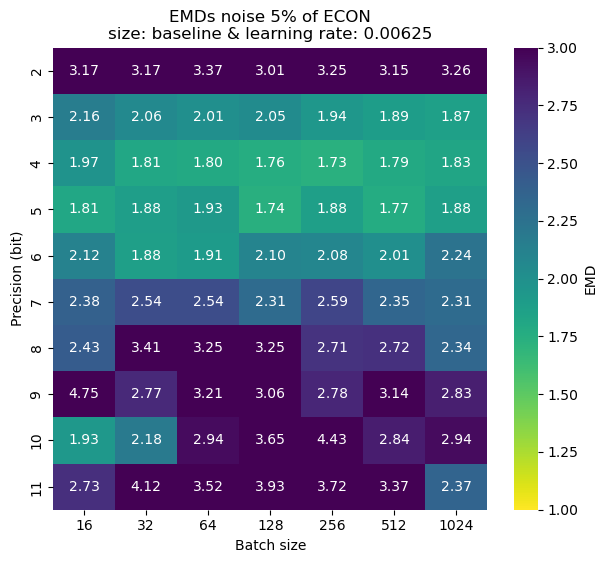

--------------------------------------------------------------------------------


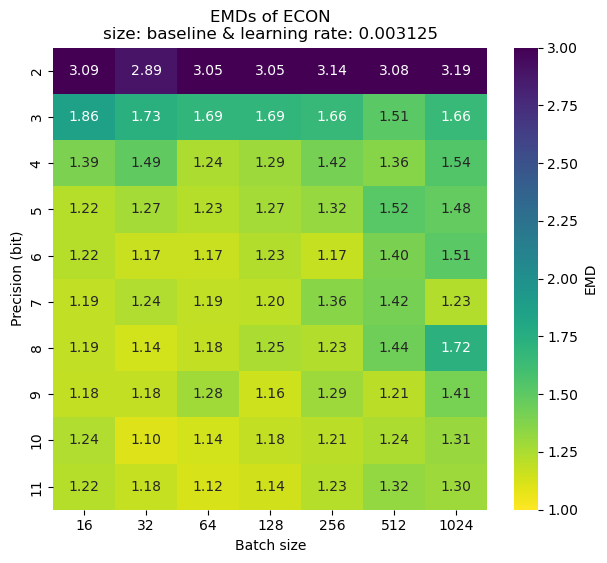

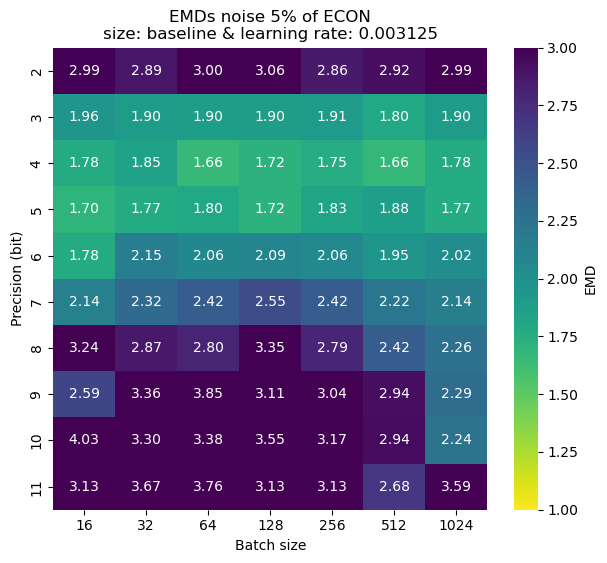

--------------------------------------------------------------------------------


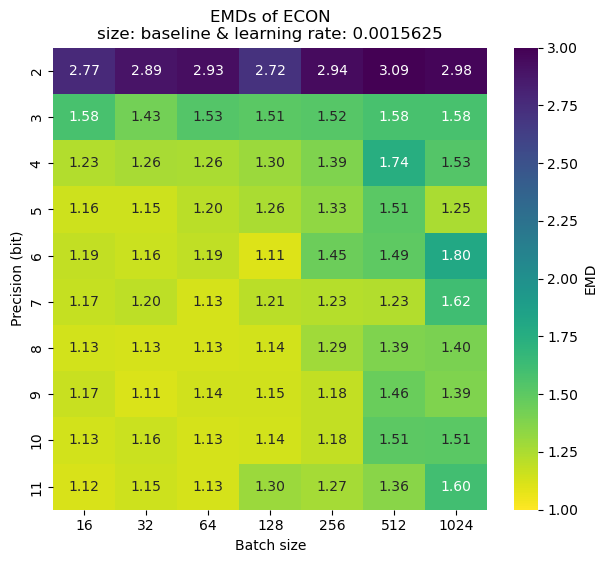

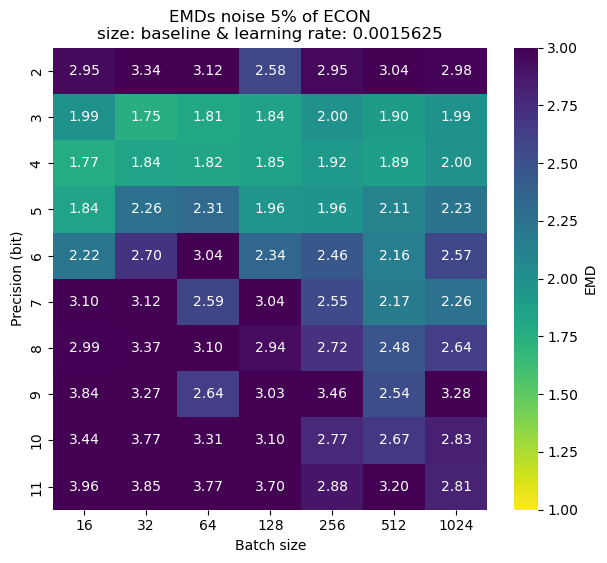

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:2

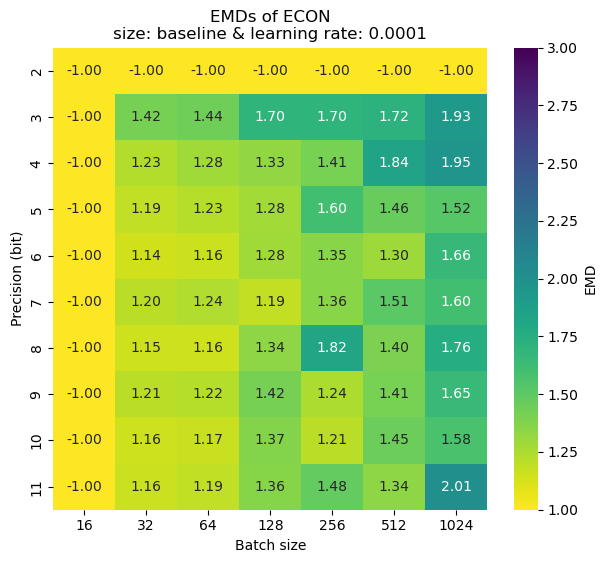

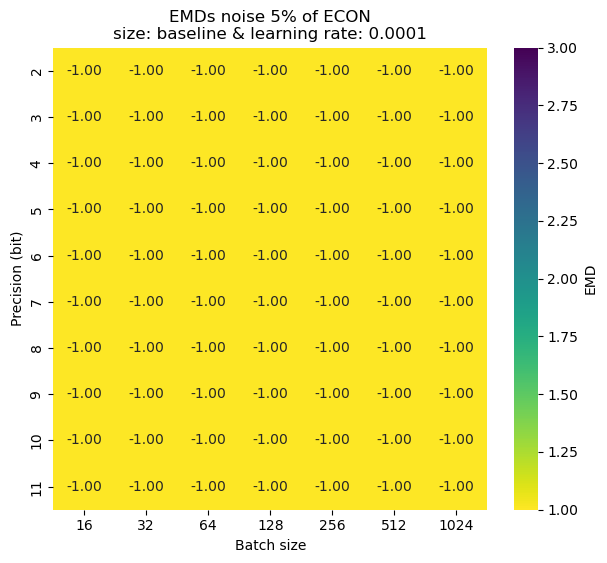

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs32_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs64_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs128_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: 

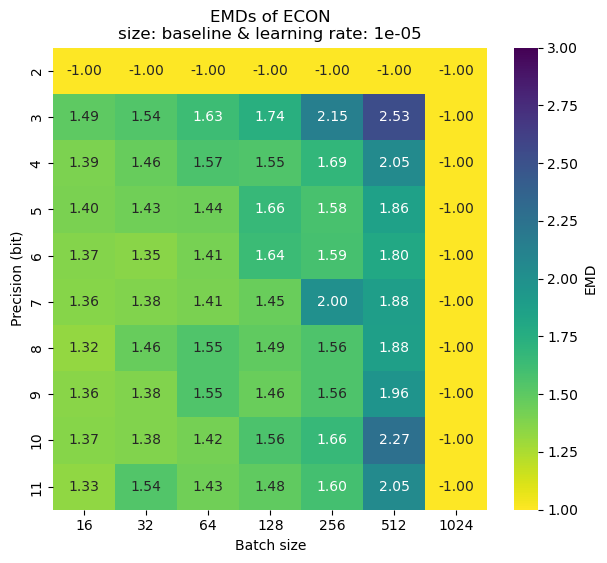

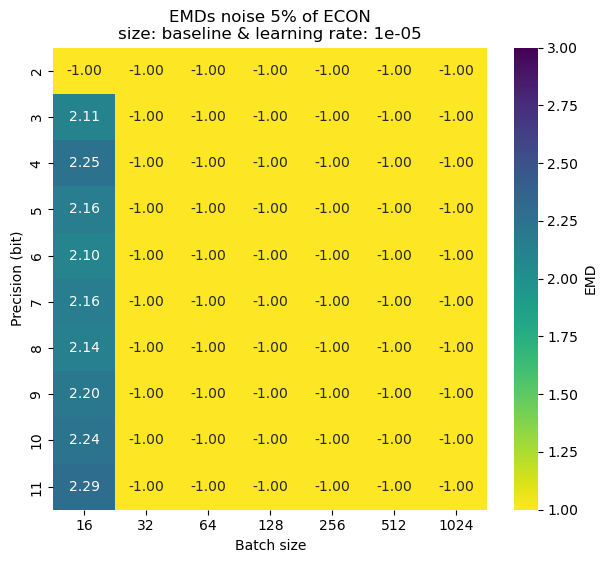

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: U

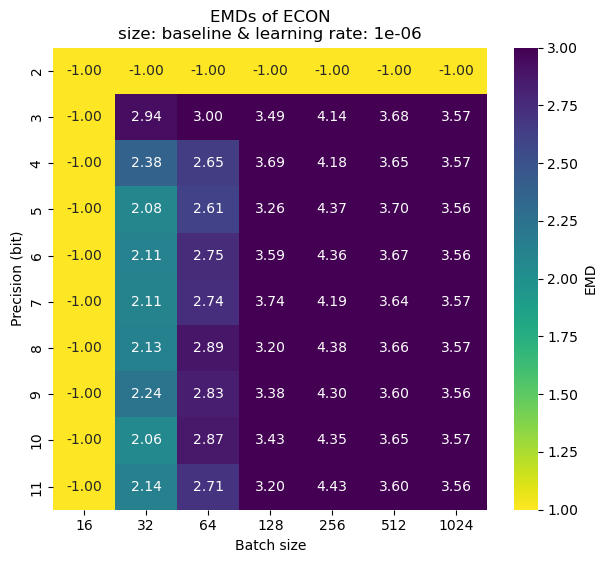

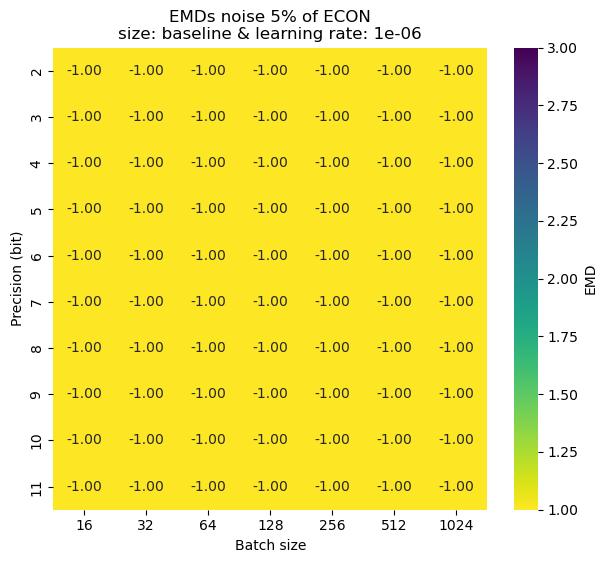

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: U

In [12]:

for lr in learning_rates:
    matrix = np.zeros((len(precisions), len(batch_sizes)))
    noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            mean_emd = get_emd(DATA_PATH, bs, lr, p, size)
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            
            # build the heatmap matrix
            matrix[x, y] = mean_emd
            noise_matrix[x, y] = noise_emd_5

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'EMDs of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    
    plot_2d_heatmap(noise_matrix, 
                    f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    

--------------------------------------------------------------------------------


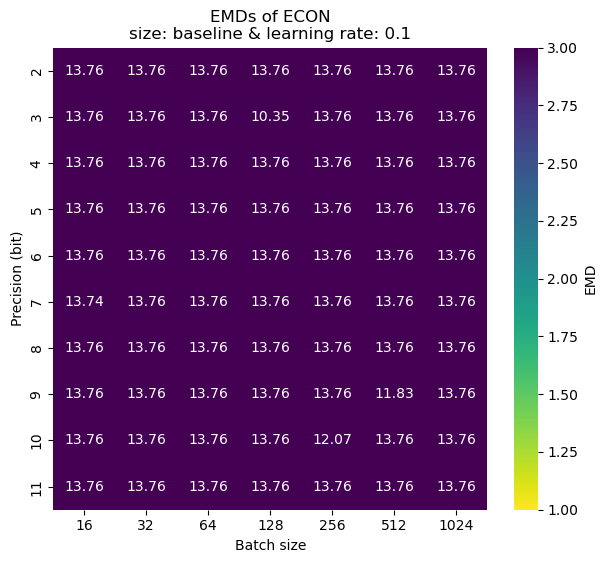

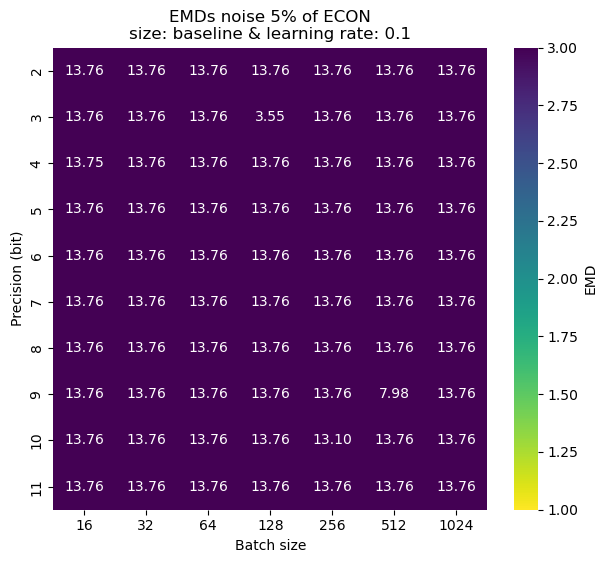

--------------------------------------------------------------------------------


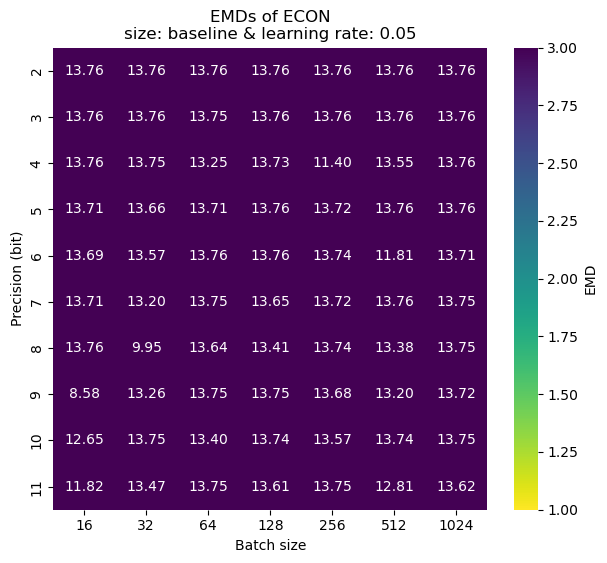

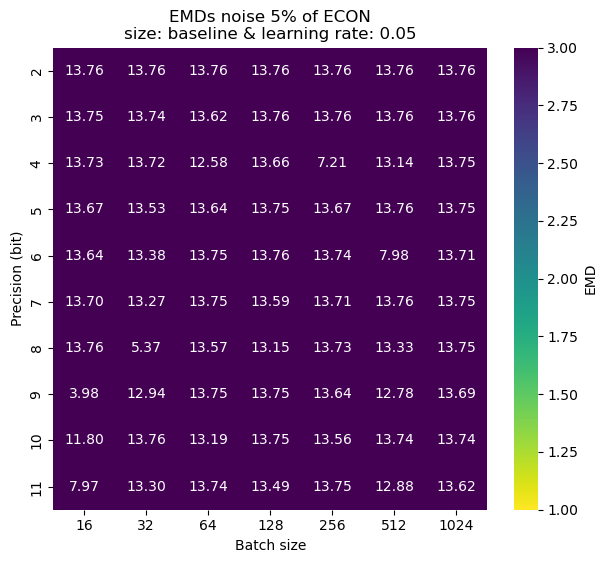

--------------------------------------------------------------------------------


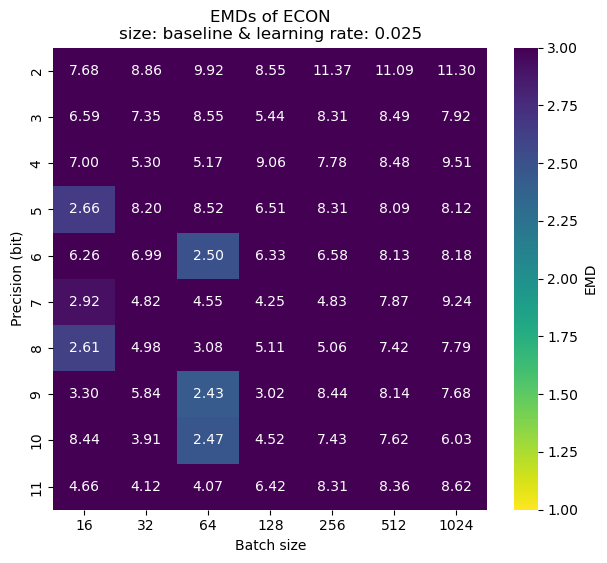

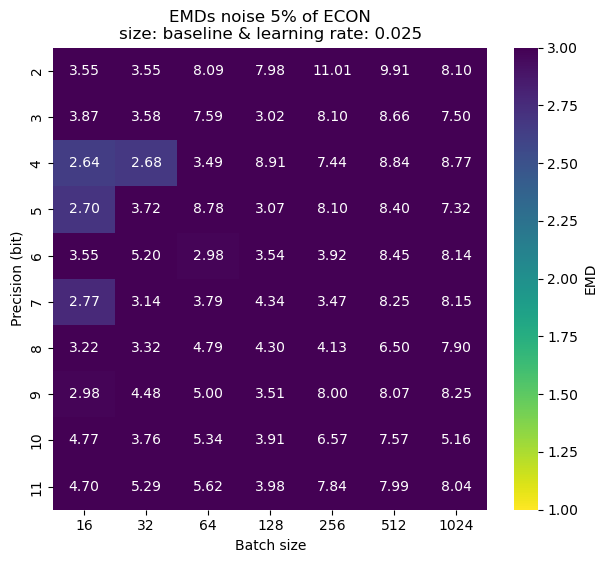

--------------------------------------------------------------------------------


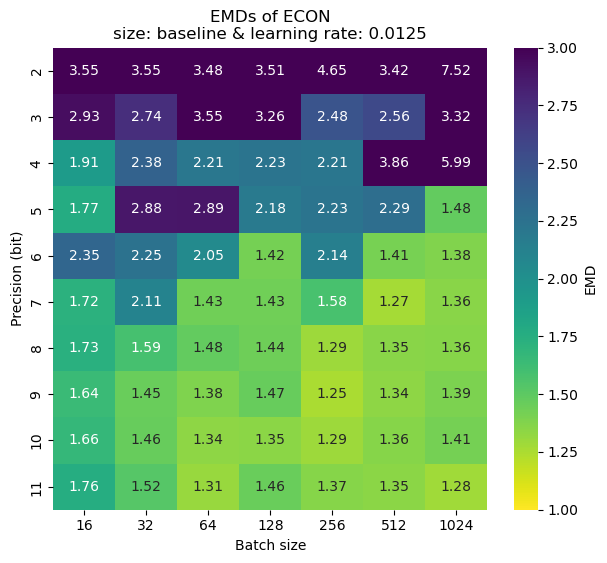

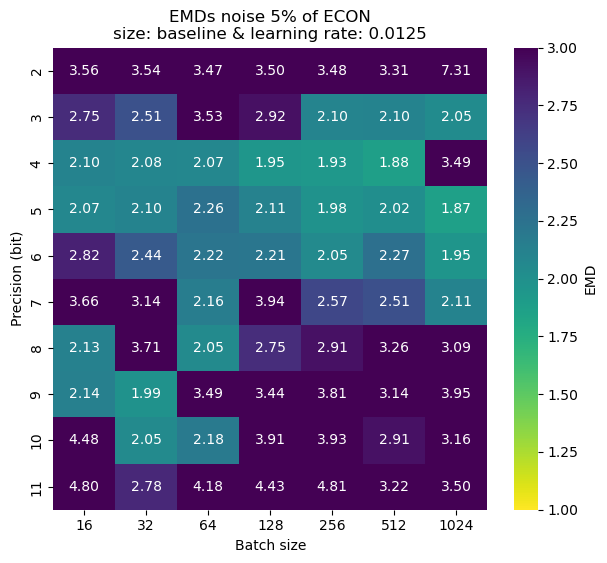

--------------------------------------------------------------------------------


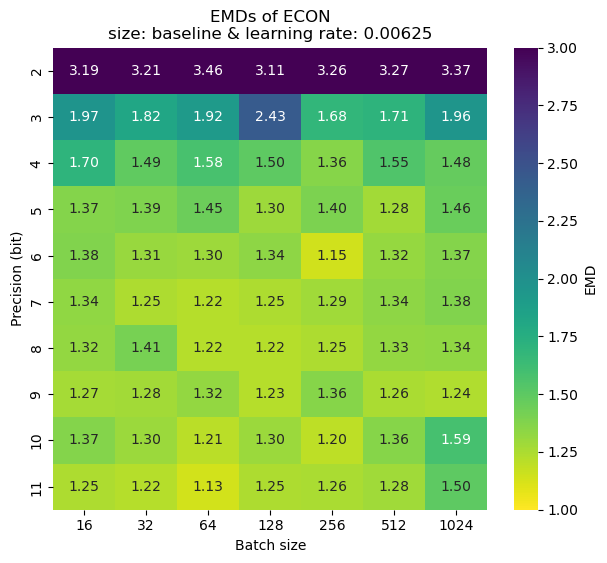

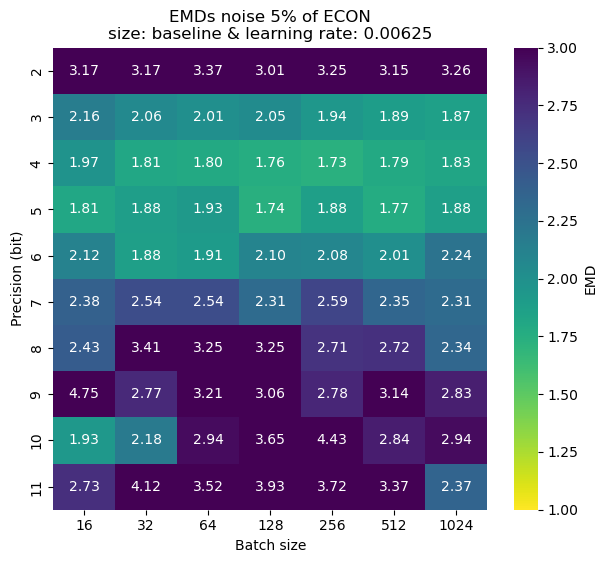

--------------------------------------------------------------------------------


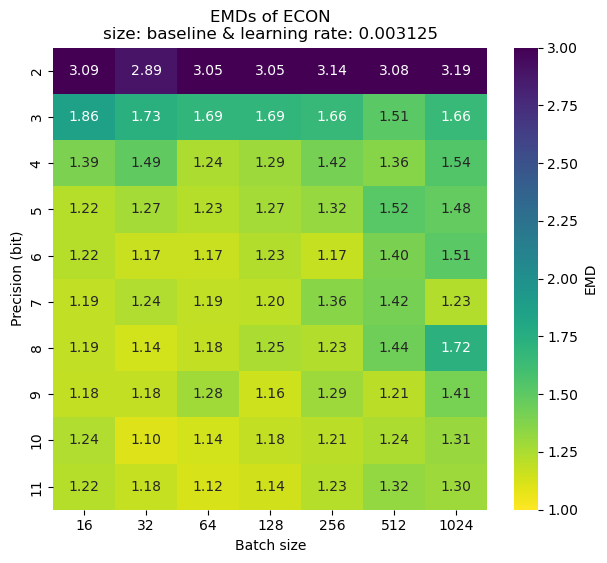

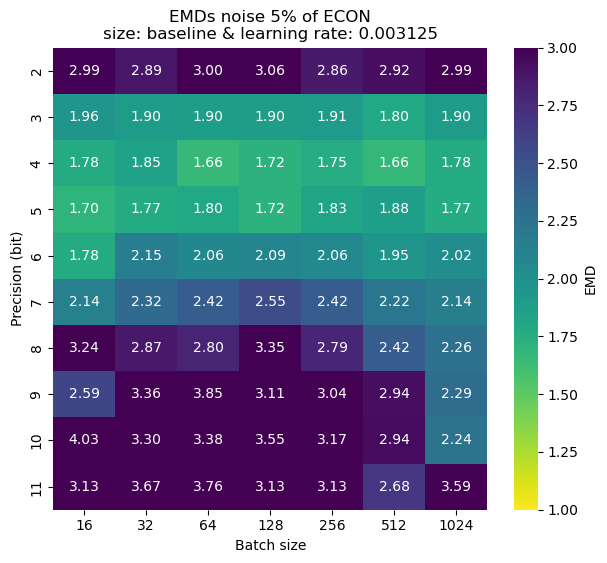

--------------------------------------------------------------------------------


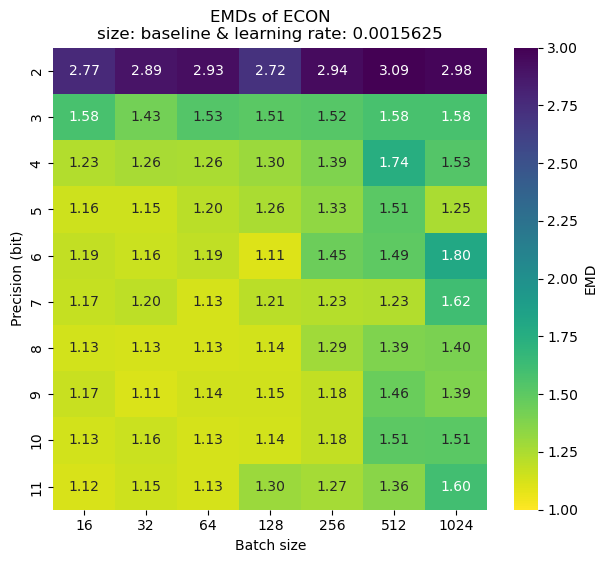

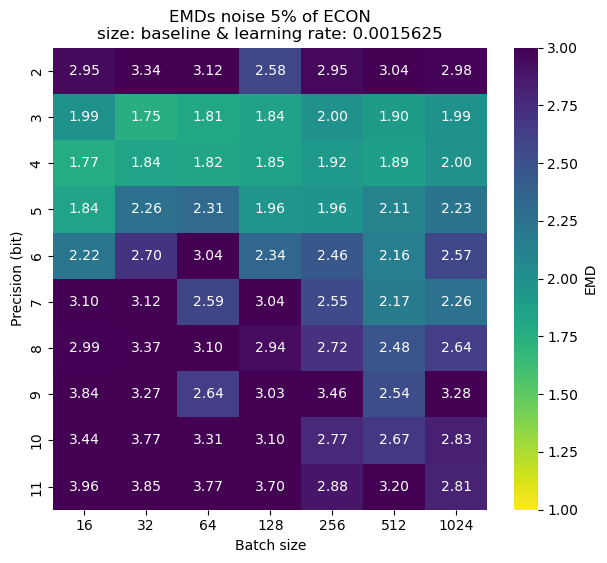

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:2

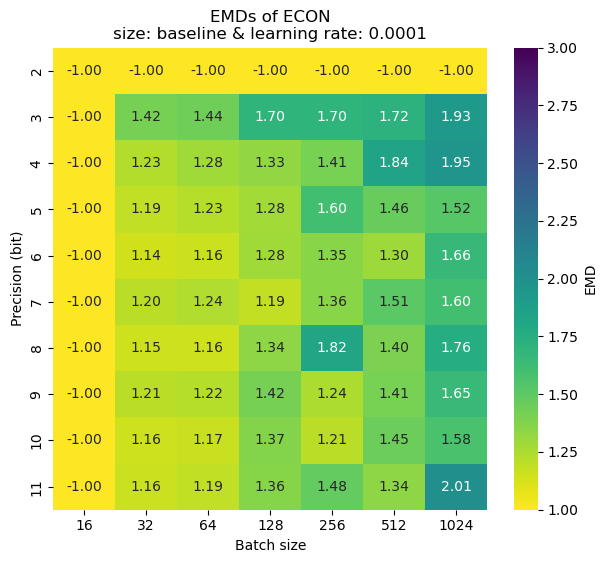

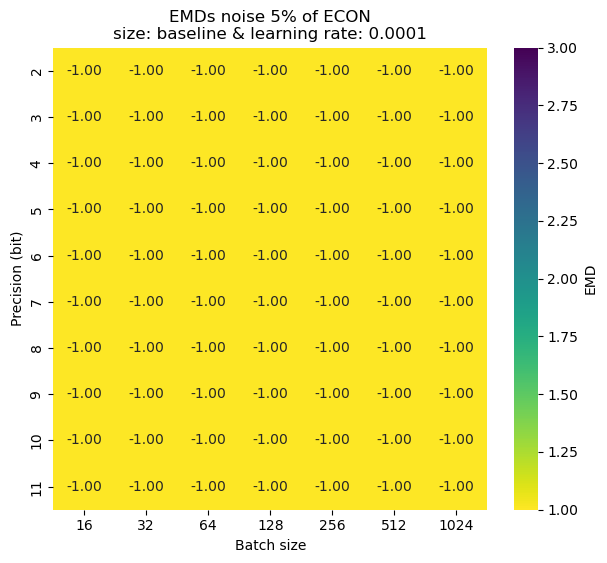

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs32_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs64_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs128_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: 

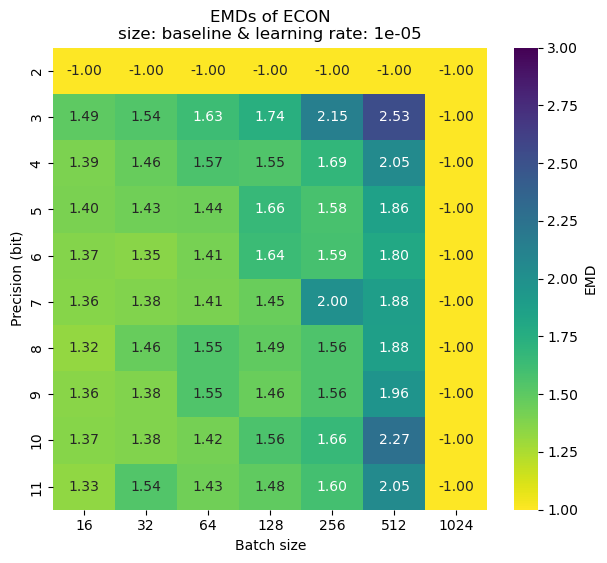

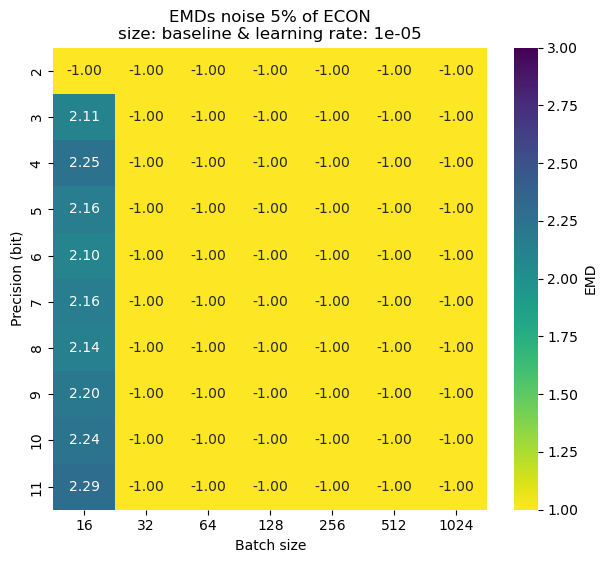

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: U

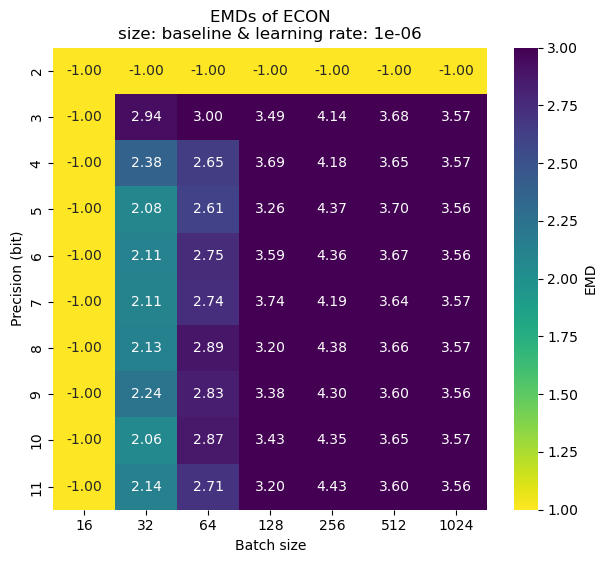

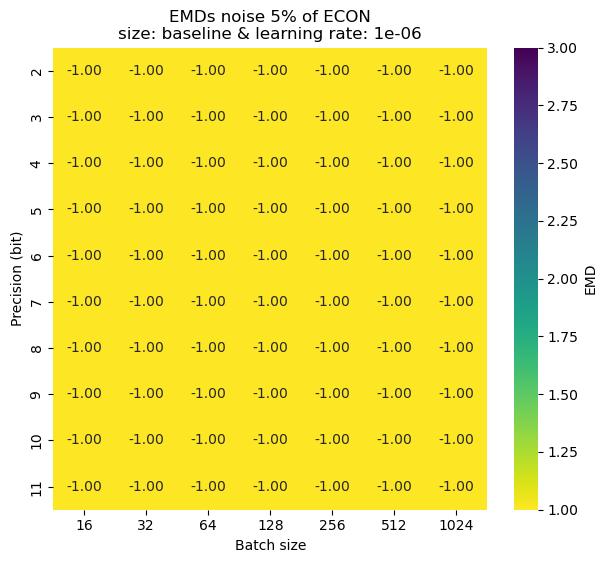

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_681201/3666458520.py:23: U

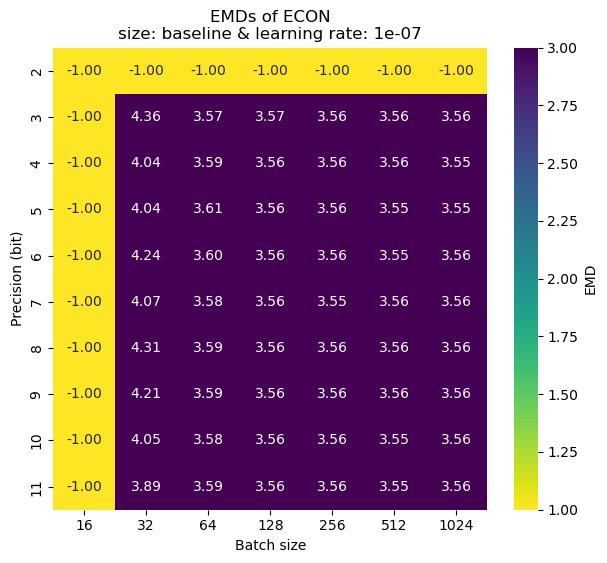

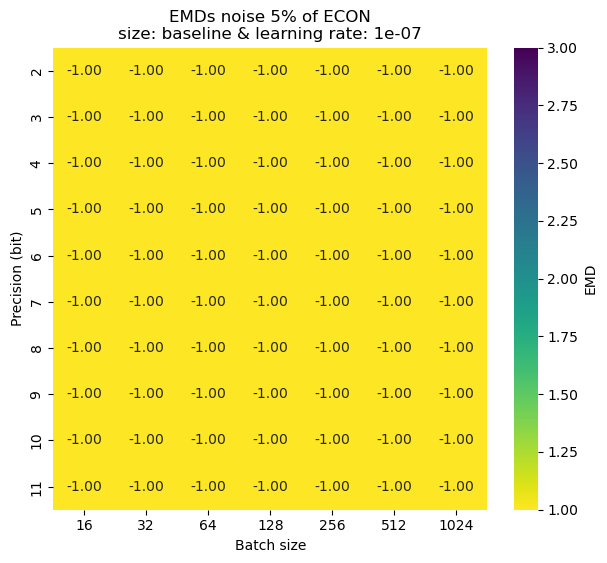

In [13]:

for lr in learning_rates:
    matrix = np.zeros((len(precisions), len(batch_sizes)))
    noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            mean_emd = get_emd(DATA_PATH, bs, lr, p, size)
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            
            # build the heatmap matrix
            matrix[x, y] = mean_emd
            noise_matrix[x, y] = noise_emd_5

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'EMDs of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    
    plot_2d_heatmap(noise_matrix, 
                    f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    

In [14]:
noise_types = ['gaussian', 'random', 'salt_pepper']
intensities = [5, 10, 15, 20]
batch_sizes = [32, 64, 128, 256, 512, 1024]
learning_rates = [0.0015625]
emd_distribution = []
for lr in learning_rates:
    for bs in batch_sizes:
        for p in precisions:
            noise_emd_5 = []
            noise_emd_10 = []
            noise_emd_15 = []
            noise_emd_20 = []
            original_emd = get_emd(DATA_PATH, bs, lr, p, size)
            for noise in noise_types:
                noise_emd_5.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 5))
                noise_emd_10.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 10))
                noise_emd_15.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 15))
                noise_emd_20.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 20))
            
            
            emd_distribution.append({
                    'precision': p, 
                    'emd': original_emd,
                    'noise 5%': mean(noise_emd_5),
                    'noise 10%': mean(noise_emd_10),
                    'noise 15%': mean(noise_emd_15),
                    'noise 20%': mean(noise_emd_20),
                    'batch_size': str(bs),
                    'learning_rate': str(lr),
                    'type': "standard"
                })

In [15]:
emd_distribution_df = pd.DataFrame(emd_distribution)
emd_distribution_df.head(20)

precision       emd  noise 5%  noise 10%  noise 15%  noise 20% batch_size  \
0           2  2.894219  3.624308   3.727183   3.824721   3.896752         32   
1           3  1.428586  2.383232   2.673286   2.896493   3.061683         32   
2           4  1.262199  2.337669   2.675181   2.901907   3.069506         32   
3           5  1.151243  2.568650   2.942064   3.152464   3.278220         32   
4           6  1.162778  2.704586   3.011892   3.180216   3.278355         32   
5           7  1.195485  2.826155   3.156592   3.293379   3.382403         32   
6           8  1.127017  2.897284   3.175194   3.315701   3.426335         32   
7           9  1.114145  2.895088   3.204295   3.355309   3.458331         32   
8          10  1.162752  3.138912   3.441605   3.621379   3.751492         32   
9          11  1.153144  3.160847   3.451431   3.618471   3.733122         32   
10          2  2.925020  3.405338   3.480335   3.554423   3.604026         64   
11          3  1.534006  2.352603   2.630114   2.834808   2.980485         64   
12          4  1.255315  2.235527   2.524976   2.715169   2.827949         64   
13          5  1.203289  2.433102   2.731776   2.865858   2.942910         64   
14          6  1.191106  2.773940   3.098210   3.233151   3.318527         64   
15          7  1.132471  2.653783   3.136153   3.381215   3.536070         64   
16          8  1.127975  2.765635   3.097714   3.249281   3.343111         64   
17          9  1.143858  2.529091   2.780903   2.911227   3.000834         64   
18         10  1.126236  2.845030   3.134403   3.286262   3.404521         64   
19         11  1.127617  3.077804   3.379361   3.544816   3.663986         64   

   learning_rate      type  
0      0.0015625  standard  
1      0.0015625  standard  
2      0.0015625  standard  
3      0.0015625  standard  
4      0.0015625  standard  
5      0.0015625  standard  
6      0.0015625  standard  
7      0.0015625  standard  
8      0.0015625  standard  
9      0.0015625  standard  
10     0.0015625  standard  
11     0.0015625  standard  
12     0.0015625  standard  
13     0.0015625  standard  
14     0.0015625  standard  
15     0.0015625  standard  
16     0.0015625  standard  
17     0.0015625  standard  
18     0.0015625  standard  
19     0.0015625  standard

In [16]:
emd_distribution_df.to_csv("./results/econ/std_noise.csv", index=False)

## ECON with Noise Injection in the training

In [17]:
def get_emd(path, batch_size, learning_rate, precision, size, percentage=0.3, num_tests=3):
    EMDs = []
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    for i in range(1, num_tests + 1):
        file_path = os.path.join(
            path, 
            f'bs{batch_size}_lr{lr}/ECON_AUG_{precision}b/{size}/{size}_emd_{i}_{percentage}.txt'
        )
        try:
            with open(file_path) as emd_file:
                emd_text = emd_file.read()
                emd_data = ast.literal_eval(emd_text)
                emd = emd_data[0]['AVG_EMD']
                EMDs.append(emd)
        except FileNotFoundError:
            continue
        except Exception as e:
            #warnings.warn(f"An error occurred while processing {file_path}: {e}")
            continue
    
    if not EMDs:
        #warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
        return -1
    
    return mean(EMDs)


def get_emd_with_noise(path, batch_size, learning_rate, precision, size, noise_type, percentage, aug_percentage=0.3):
    '''
    Return the EMD achieved by the Model with a certain level of noise
    '''
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    file_path = os.path.join(
                path,
                f'bs{batch_size}_lr{lr}/' \
                f'ECON_AUG_{precision}b/{size}/emd_aug_{aug_percentage}_{noise_type}_{percentage}.txt'
        ) 
    noise_emd = -1
    try:
        emd_file = open(file_path)
        emd_text = emd_file.read()
        if not emd_text.startswith('['):
            noise_emd = float(emd_text)
        else:
            emd = ast.literal_eval(emd_text)
            noise_emd = emd[0]['AVG_EMD']
        emd_file.close()
    except Exception as e:
        # warnings.warn("Warning: " + file_path + " not found!")
        return -1
    return noise_emd

In [18]:
noise_type = 'gaussian'
percentage = 5
learning_rates = [0.0015625]
batch_sizes = [32, 64, 128, 256, 512, 1024]
aug_percentages = [0.3, 0.5, 0.8]

--------------------------------------------------------------------------------


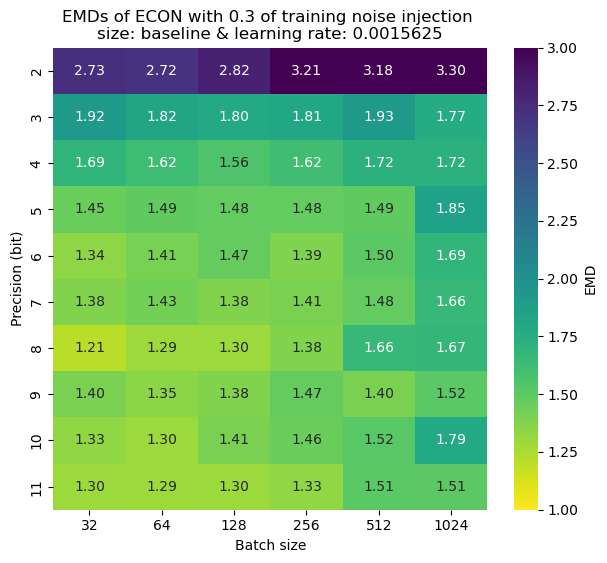

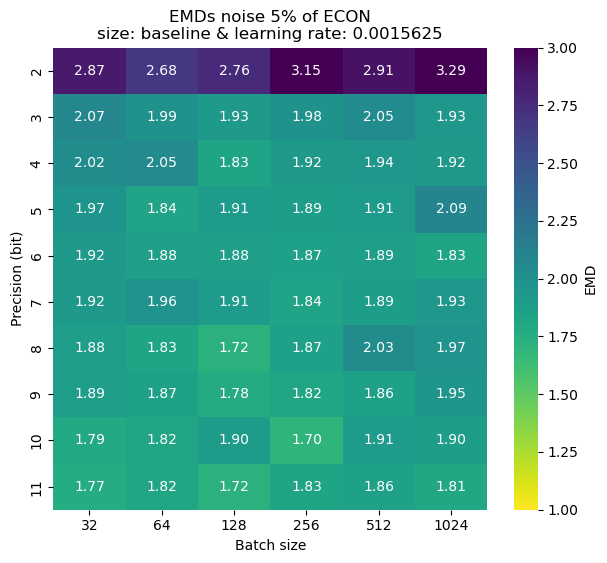

--------------------------------------------------------------------------------


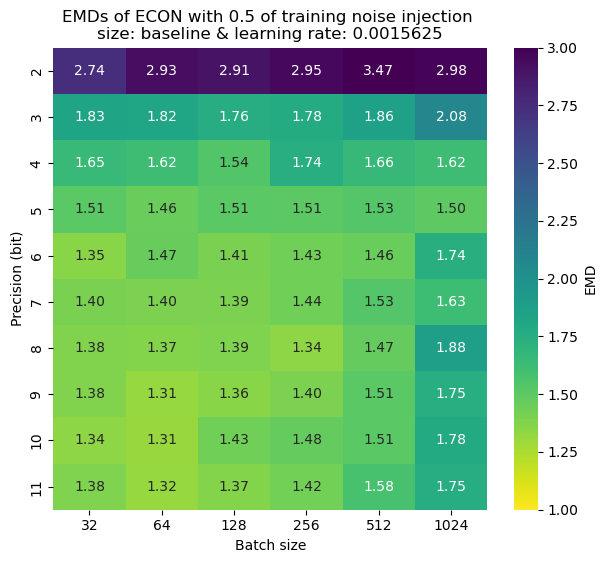

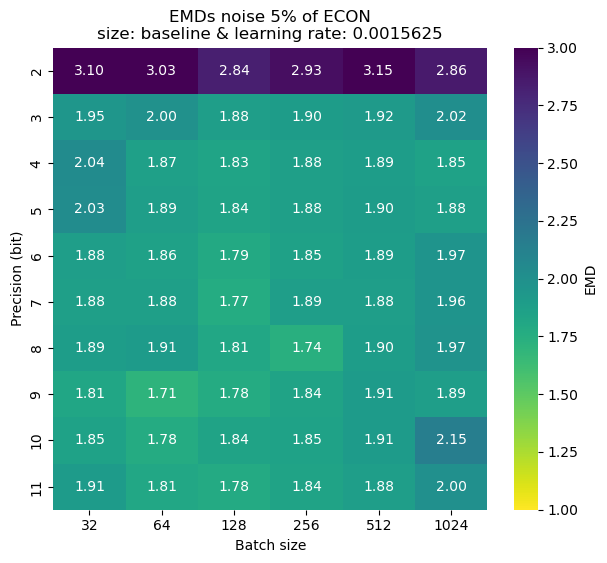

--------------------------------------------------------------------------------


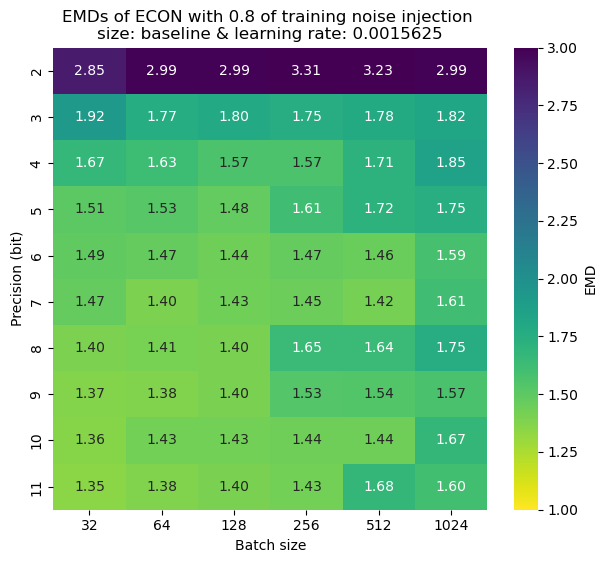

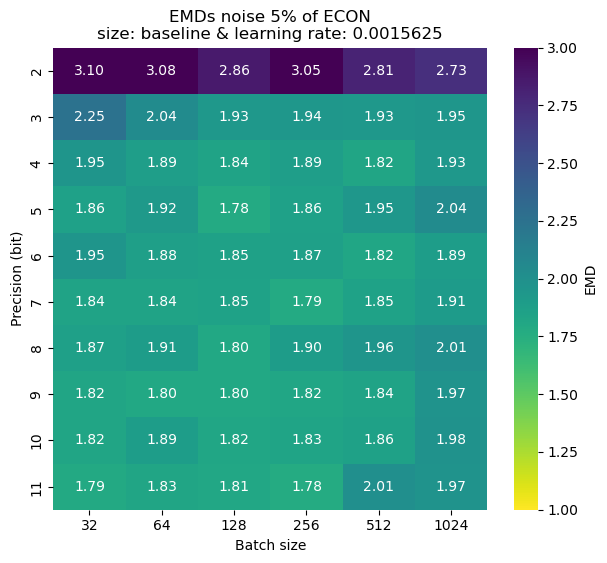

In [19]:
for aug_percentage in aug_percentages:
    for lr in learning_rates:
        matrix = np.zeros((len(precisions), len(batch_sizes)))
        noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
        for y, bs in enumerate(batch_sizes):
            for x, p in enumerate(precisions):
                # get the performances with and without noise
                mean_emd = get_emd(DATA_PATH, bs, lr, p, size, percentage=aug_percentage)
                noisy_emd = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, percentage, aug_percentage)
                
                # build the heatmap matrix
                matrix[x, y] = mean_emd
                noise_matrix[x, y] = noisy_emd

                
        # plot the heatmaps per precision
        matrix = pd.DataFrame(matrix, 
                            index=precisions, 
                            columns=batch_sizes)
        noise_matrix = pd.DataFrame(noise_matrix, 
                              index=precisions, 
                              columns=batch_sizes)
        print(80*'-')
        plot_2d_heatmap(matrix, 
                        f'EMDs of ECON with {aug_percentage} of training noise injection \nsize: {size} & learning rate: {lr}', 
                        (1, 3),
                        'Batch size',
                        'Precision (bit)',
                        'EMD',
                        cmap='viridis_r')
        
        plot_2d_heatmap(noise_matrix, 
                        f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                        (1, 3),
                        'Batch size',
                        'Precision (bit)',
                        'EMD',
                        cmap='viridis_r')
        

In [20]:
noise_types = ['gaussian', 'random', 'salt_pepper']
intensities = [5, 10, 15, 20]
batch_sizes = [32, 64, 128, 256, 512, 1024]
learning_rates = [0.0015625]
emd_distribution = []
for lr in learning_rates:
    for bs in batch_sizes:
        for aug_percentage in aug_percentages:
            for p in precisions:
                noise_emd_5 = []
                noise_emd_10 = []
                noise_emd_15 = []
                noise_emd_20 = []
                original_emd = get_emd(DATA_PATH, bs, lr, p, size, percentage=aug_percentage)
                for noise in noise_types:
                    noise_emd_5.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 5, aug_percentage))
                    noise_emd_10.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 10, aug_percentage))
                    noise_emd_15.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 15, aug_percentage))
                    noise_emd_20.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 20, aug_percentage))
                
                
                emd_distribution.append({
                        'precision': p, 
                        'emd': original_emd,
                        'noise 5%': mean(noise_emd_5),
                        'noise 10%': mean(noise_emd_10),
                        'noise 15%': mean(noise_emd_15),
                        'noise 20%': mean(noise_emd_20),
                        'batch_size': str(bs),
                        'learning_rate': str(lr),
                        'type': f"{int(aug_percentage * 100)}% noise injection"
                    })

In [21]:
emd_distribution_df = pd.DataFrame(emd_distribution)
emd_distribution_df.head(10)

precision       emd  noise 5%  noise 10%  noise 15%  noise 20% batch_size  \
0          2  2.728690  3.267749   3.478489   3.643094   3.761252         32   
1          3  1.918926  2.666520   2.939692   3.139764   3.291430         32   
2          4  1.689394  2.583393   2.983548   3.285152   3.513656         32   
3          5  1.453242  2.478510   2.851840   3.093825   3.262711         32   
4          6  1.339352  2.385287   2.770384   3.027662   3.197576         32   
5          7  1.377370  2.396889   2.795632   3.044860   3.218520         32   
6          8  1.214114  2.274173   2.678509   2.951870   3.106226         32   
7          9  1.400071  2.343428   2.707084   2.964328   3.133047         32   
8         10  1.330939  2.251493   2.630917   2.864458   3.015661         32   
9         11  1.301836  2.239659   2.632854   2.908742   3.090434         32   

  learning_rate                 type  
0     0.0015625  30% noise injection  
1     0.0015625  30% noise injection  
2     0.0015625  30% noise injection  
3     0.0015625  30% noise injection  
4     0.0015625  30% noise injection  
5     0.0015625  30% noise injection  
6     0.0015625  30% noise injection  
7     0.0015625  30% noise injection  
8     0.0015625  30% noise injection  
9     0.0015625  30% noise injection

In [22]:
emd_distribution_df.to_csv("./results/econ/aug_noise.csv", index=False)

## ECON with Jacobian regularization

In [23]:

def get_emd(path, batch_size, learning_rate, precision, size, percentage=0.3, num_tests=3):
    EMDs = []
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    for i in range(1, num_tests + 1):
        file_path = os.path.join(
            path, 
            f'bs{batch_size}_lr{lr}/ECON_JREG_{precision}b/{size}/{size}_emd_{i}_{percentage}.txt'
        )
        try:
            with open(file_path) as emd_file:
                emd_text = emd_file.read()
                emd_data = ast.literal_eval(emd_text)
                emd = emd_data[0]['AVG_EMD']
                EMDs.append(emd)
        except FileNotFoundError:
            continue
        except Exception as e:
            #warnings.warn(f"An error occurred while processing {file_path}: {e}")
            continue
    
    if not EMDs:
        #warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
        return -1
    
    return mean(EMDs)



def get_emd_with_noise(path, batch_size, learning_rate, precision, size, noise_type, percentage, jreg=0.1):
    '''
    Return the EMD achieved by the Model with a certain level of noise
    '''
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    file_path = os.path.join(
                path,
                f'bs{batch_size}_lr{lr}/' \
                f'ECON_JREG_{precision}b/{size}/emd_jreg_{jreg}_{noise_type}_{percentage}.txt'
        ) 
    noise_emd = -1
    try:
        emd_file = open(file_path)
        emd_text = emd_file.read()
        if not emd_text.startswith('['):
            noise_emd = float(emd_text)
        else:
            emd = ast.literal_eval(emd_text)
            noise_emd = emd[0]['AVG_EMD']
        emd_file.close()
    except Exception as e:
        # warnings.warn("Warning: " + file_path + " not found!")
        return -1
    return noise_emd

In [24]:
noise_type = 'gaussian'
percentage = 5
learning_rates = [0.0015625]
jreg_percentages = [0.1, 0.01, 0.001, 0.0001]

--------------------------------------------------------------------------------


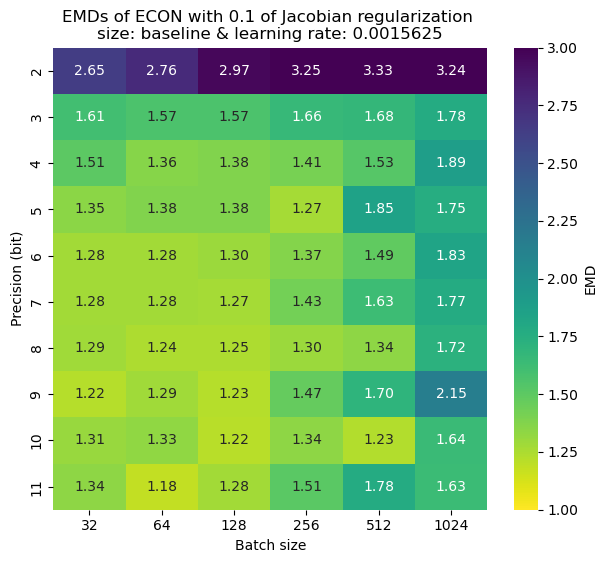

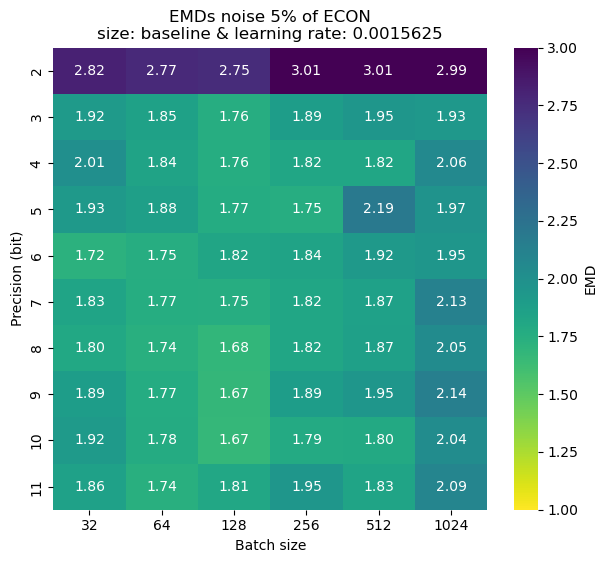

--------------------------------------------------------------------------------


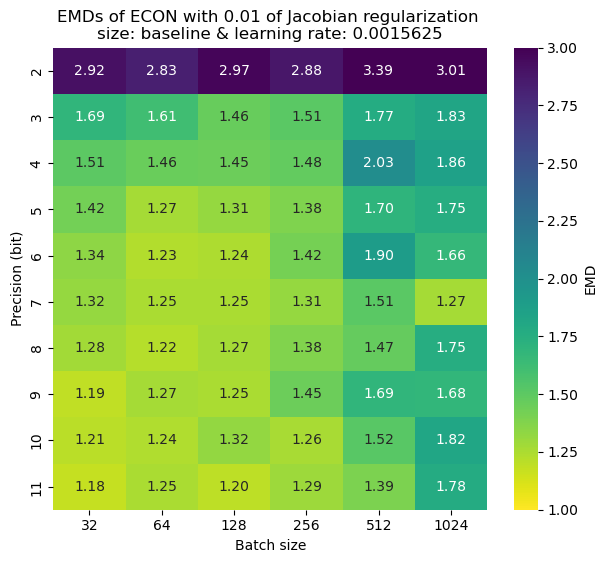

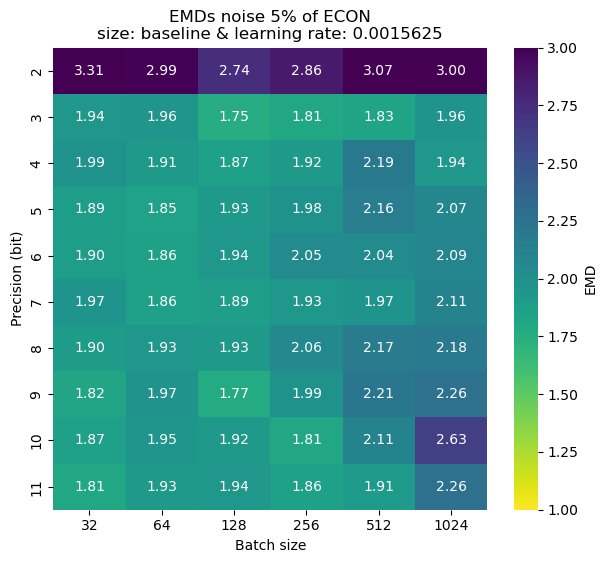

--------------------------------------------------------------------------------


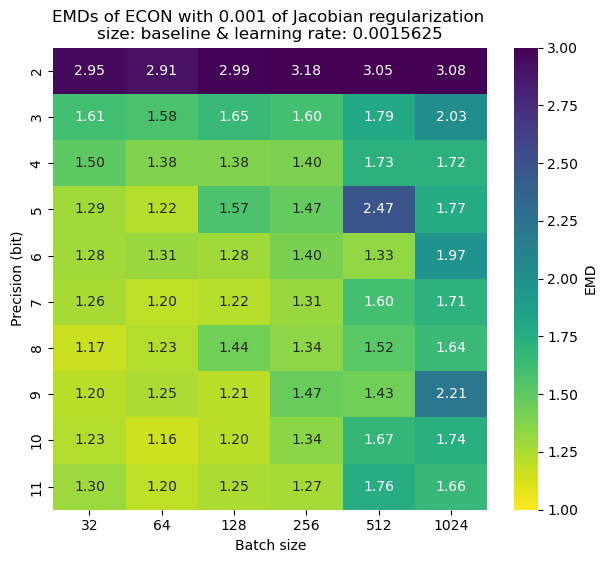

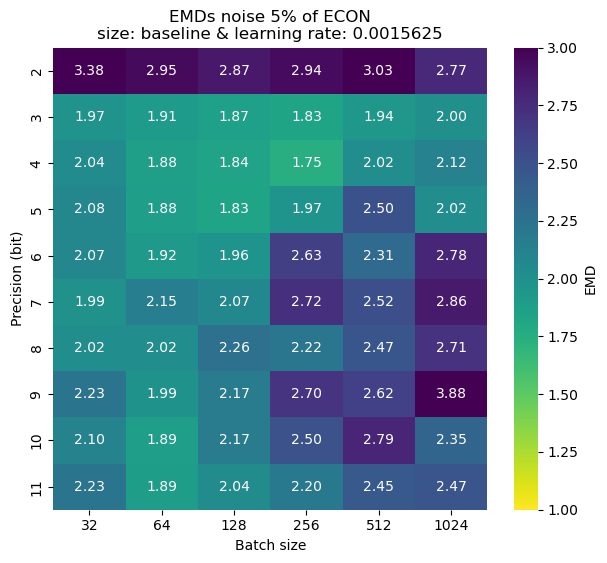

--------------------------------------------------------------------------------


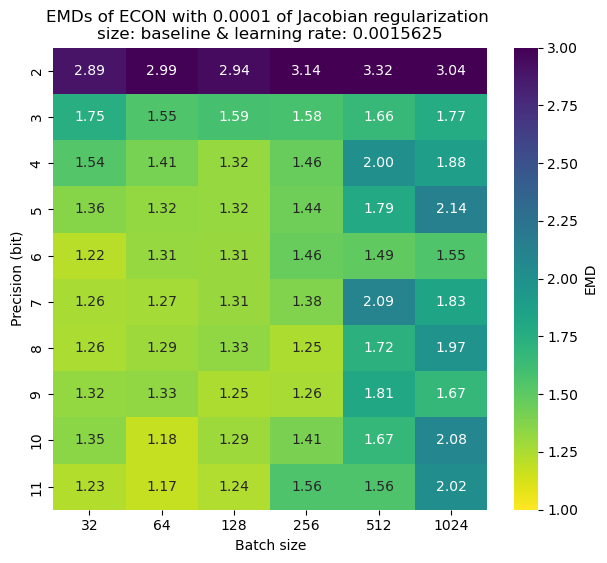

In [25]:
for jreg_percentage in jreg_percentages:
    for lr in learning_rates:
        matrix = np.zeros((len(precisions), len(batch_sizes)))
        noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
        for y, bs in enumerate(batch_sizes):
            for x, p in enumerate(precisions):
                
                # get the performances with and without noise
                mean_emd = get_emd(DATA_PATH, bs, lr, p, size, percentage=jreg_percentage)
                noisy_emd = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, percentage, jreg_percentage)
                
                # build the heatmap matrix
                matrix[x, y] = mean_emd
                noise_matrix[x, y] = noisy_emd

                
        # plot the heatmaps per precision
        matrix = pd.DataFrame(matrix, 
                            index=precisions, 
                            columns=batch_sizes)
        noise_matrix = pd.DataFrame(noise_matrix, 
                              index=precisions, 
                              columns=batch_sizes)
        print(80*'-')
        plot_2d_heatmap(matrix, 
                        f'EMDs of ECON with {jreg_percentage} of Jacobian regularization \nsize: {size} & learning rate: {lr}', 
                        (1, 3),
                        'Batch size',
                        'Precision (bit)',
                        'EMD',
                        cmap='viridis_r')
        
        plot_2d_heatmap(noise_matrix, 
                        f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                        (1, 3),
                        'Batch size',
                        'Precision (bit)',
                        'EMD',
                        cmap='viridis_r')
        

In [26]:
noise_types = ['gaussian', 'random', 'salt_pepper']
intensities = [5, 10, 15, 20]
batch_sizes = [32, 64, 128, 256, 512, 1024]
learning_rates = [0.0015625]
emd_distribution = []
for lr in learning_rates:
    for bs in batch_sizes:
        for jreg_percentage in jreg_percentages:
            for p in precisions:
                noise_emd_5 = []
                noise_emd_10 = []
                noise_emd_15 = []
                noise_emd_20 = []
                original_emd = get_emd(DATA_PATH, bs, lr, p, size, percentage=jreg_percentage)
                for noise in noise_types:
                    noise_emd_5.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 5, jreg_percentage))
                    noise_emd_10.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 10, jreg_percentage))
                    noise_emd_15.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 15, jreg_percentage))
                    noise_emd_20.append(get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise, 20, jreg_percentage))
                
                
                emd_distribution.append({
                        'precision': p, 
                        'emd': original_emd,
                        'noise 5%': mean(noise_emd_5),
                        'noise 10%': mean(noise_emd_10),
                        'noise 15%': mean(noise_emd_15),
                        'noise 20%': mean(noise_emd_20),
                        'batch_size': str(bs),
                        'learning_rate': str(lr),
                        'type': f"lambda JR {jreg_percentage}"
                    })

In [27]:
emd_distribution_df = pd.DataFrame(emd_distribution)
emd_distribution_df.head(10)

precision       emd  noise 5%  noise 10%  noise 15%  noise 20% batch_size  \
0          2  2.648247  3.302821   3.441157   3.595177   3.721698         32   
1          3  1.607043  2.515769   2.729630   2.925534   3.072784         32   
2          4  1.507131  2.478839   2.770285   2.952046   3.089704         32   
3          5  1.347145  2.387910   2.713761   2.916647   3.063055         32   
4          6  1.276648  2.258372   2.582751   2.797535   2.941058         32   
5          7  1.276104  2.340816   2.640996   2.847137   2.997664         32   
6          8  1.288263  2.303698   2.629250   2.842693   2.992402         32   
7          9  1.220775  2.342654   2.686987   2.892881   3.030379         32   
8         10  1.305550  2.380278   2.706502   2.911259   3.053794         32   
9         11  1.339962  2.348791   2.659544   2.860925   3.010209         32   

  learning_rate           type  
0     0.0015625  lambda JR 0.1  
1     0.0015625  lambda JR 0.1  
2     0.0015625  lambda JR 0.1  
3     0.0015625  lambda JR 0.1  
4     0.0015625  lambda JR 0.1  
5     0.0015625  lambda JR 0.1  
6     0.0015625  lambda JR 0.1  
7     0.0015625  lambda JR 0.1  
8     0.0015625  lambda JR 0.1  
9     0.0015625  lambda JR 0.1

In [28]:
emd_distribution_df.to_csv("./results/econ/jreg_noise.csv", index=False)

# RN08 (TinyResNet)
Computer vision tasks trained on CIFAR10

In [29]:
# search space
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [30]:
DATA_PATH="/data/tbaldi/work/checkpoint/"   
DATASET_DIR = "/data/tbaldi/work/loss_landscape_taxonomy/data/RN08/"

## Accuracy results

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_2b/accuracy_1.tx

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_3b/accuracy_1.tx

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_4b/accuracy_1.tx

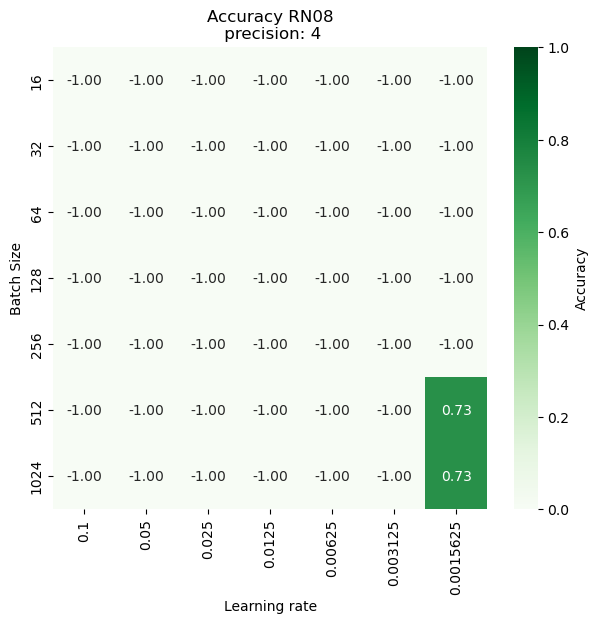

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_5b/accuracy_1.tx

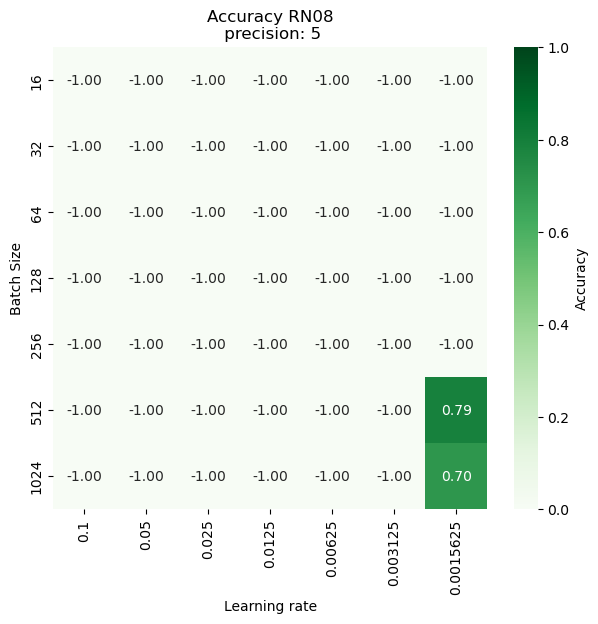

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_6b/accuracy_1.tx

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_7b/accuracy_1.tx

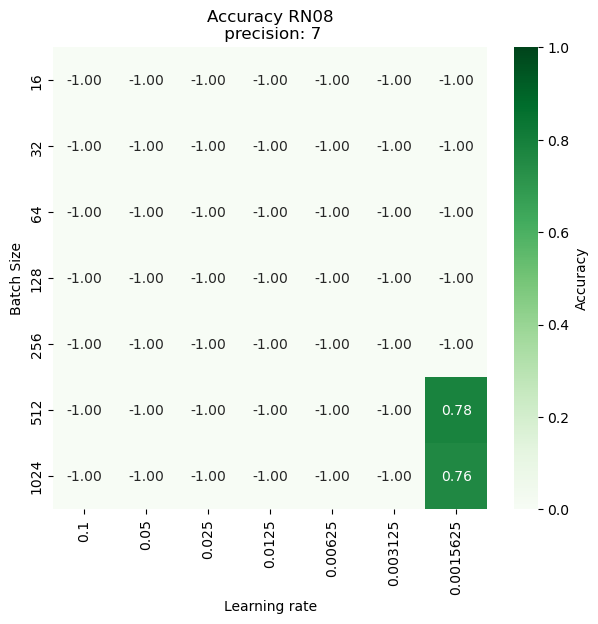

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_8b/accuracy_1.tx

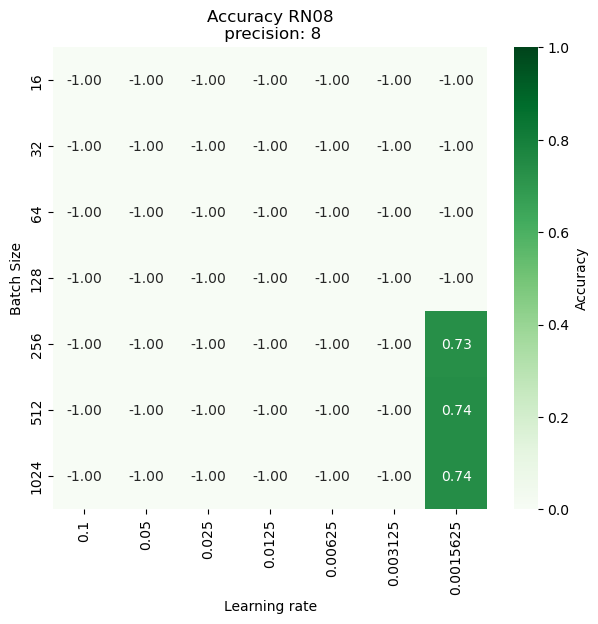

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_9b/accuracy_1.tx

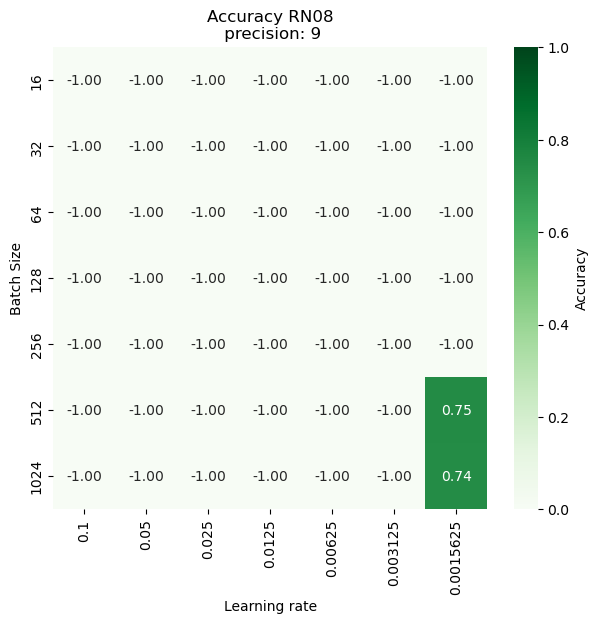

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_10b/a

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_11b/a

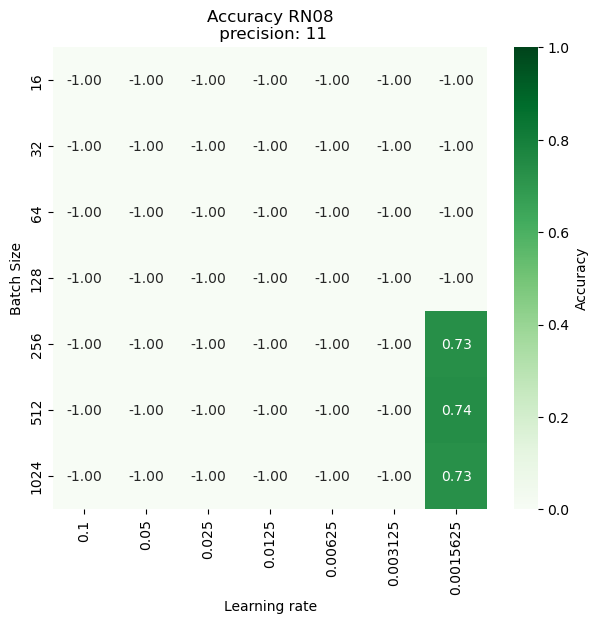

In [31]:
# plotting a heat map per layer
for p in precisions:
    matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            matrix[x, y] = acc
            
            
    matrix = pd.DataFrame(matrix, 
                          index=batch_sizes, 
                          columns=learning_rates)
    
    plot_2d_heatmap(matrix, 
                    f'Accuracy RN08\n precision: {p}', 
                    (0, 1),
                    'Learning rate',
                    'Batch Size',
                    'Accuracy',
                    cmap='Greens')

## Scientific Benchmark

In [32]:

noise_type = "pixelate"
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_pixelate.txt not found

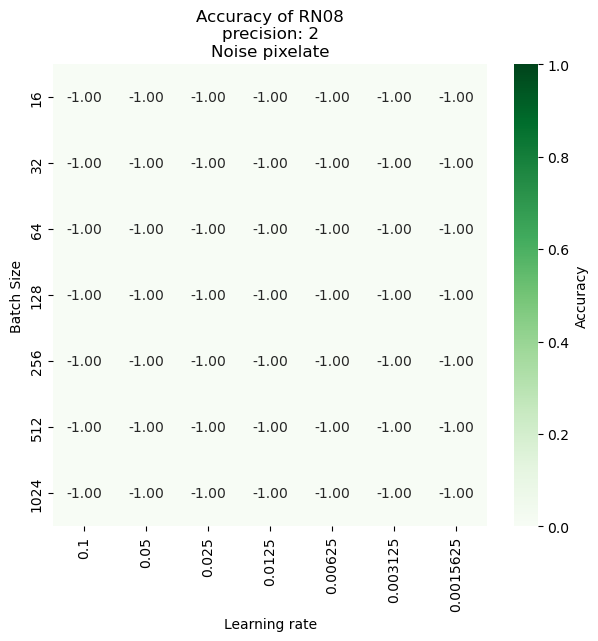

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_pixelate.txt not found

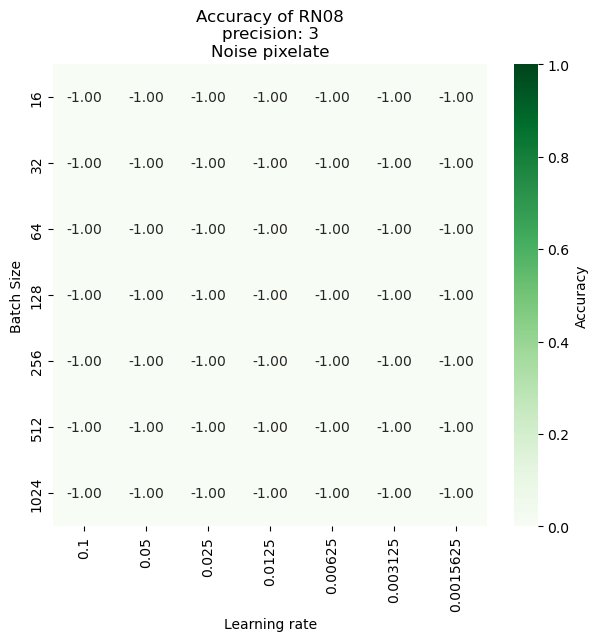

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_pixelate.txt not found

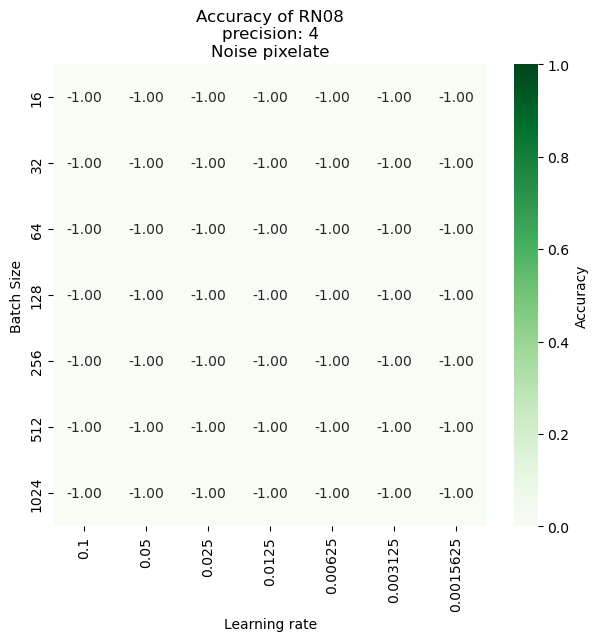

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_pixelate.txt not found

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_pixelate.txt not found

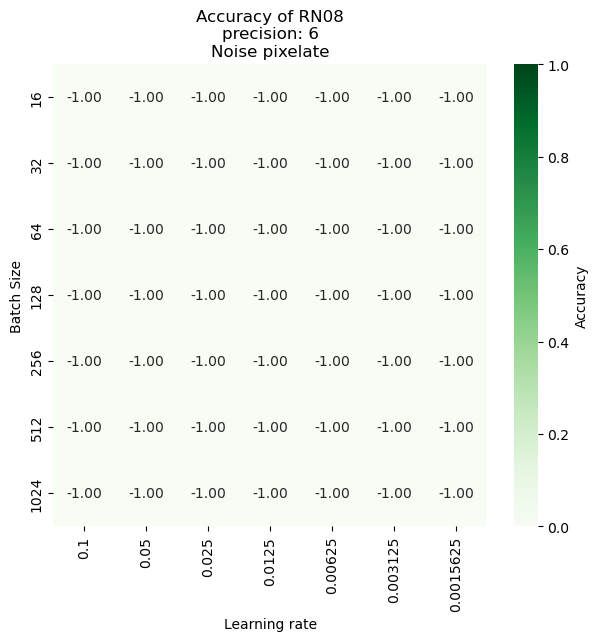

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/accuracy_pixelate.txt not found

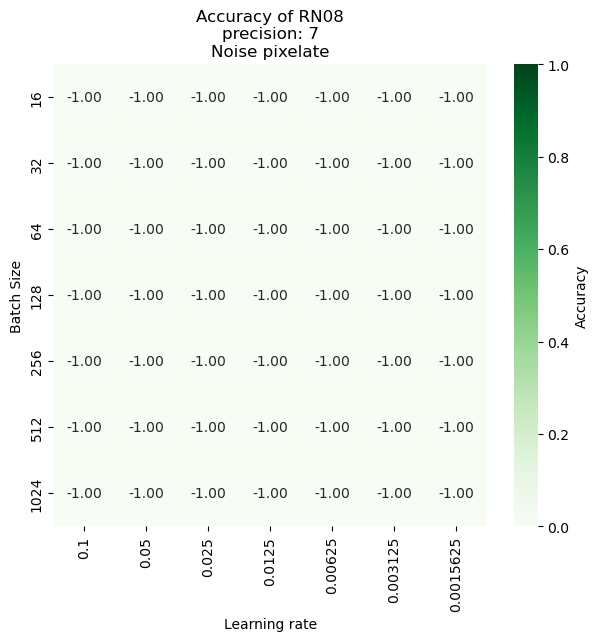

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_8b/accuracy_pixelate.txt not found

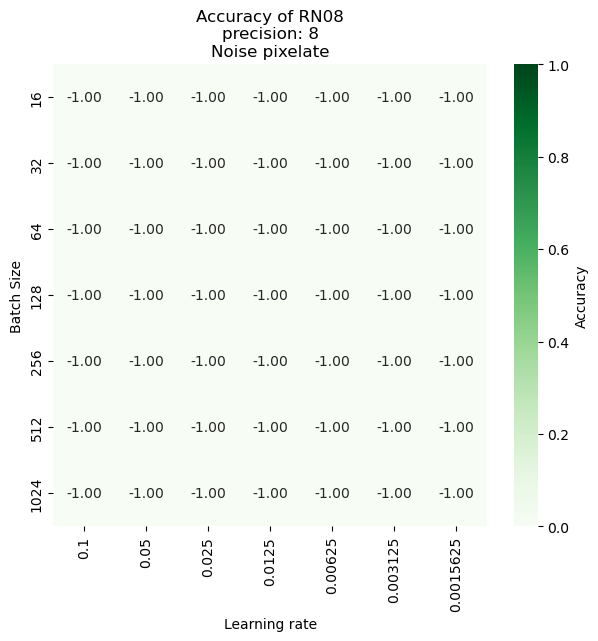

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_9b/accuracy_pixelate.txt not found

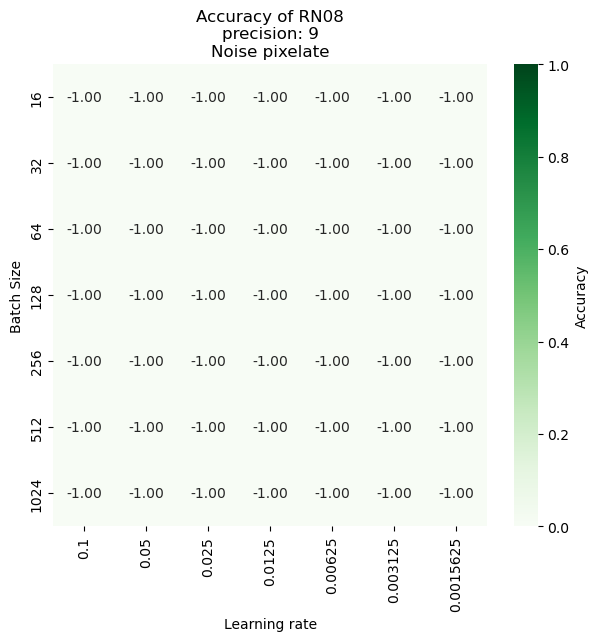

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_10b/accuracy_pixelate.t

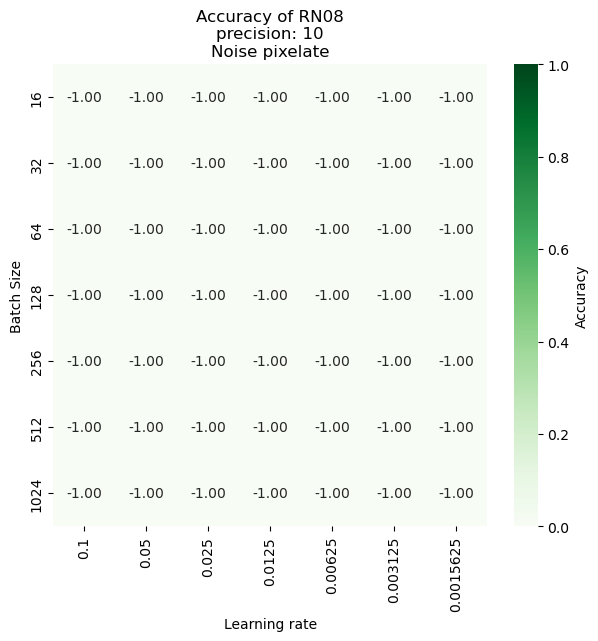

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_11b/accuracy_pixelate.t

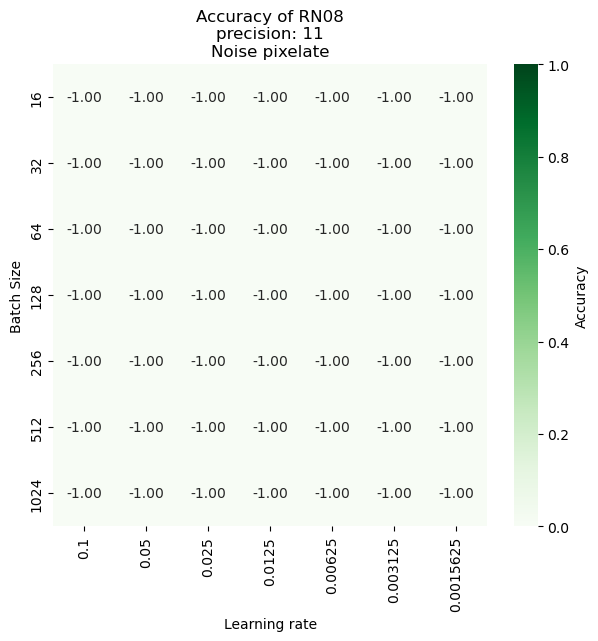

In [33]:
acc_distribution = []
for p in precisions:
    matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            matrix[x, y] = noise_acc
            
            acc_distribution.append({
                'precision': p, 
                'accuracy': acc,
                'noise accuracy': noise_acc,
                'batch_size': str(bs),
                'learning_rate': str(lr),
                'precision': p,
            })
            
    matrix = pd.DataFrame(matrix,
                          index=batch_sizes,
                          columns=learning_rates)
    
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nprecision: {p}\n' \
                    f'Noise {noise_type}', 
                    (0, 1),
                    'Learning rate',
                    'Batch Size',
                    'Accuracy',
                    cmap='Greens')

In [34]:
acc_distribution_df = pd.DataFrame(acc_distribution)
# export the CSV
acc_distribution_df.to_csv("./results/rn08/noise.csv", index=False)

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbald

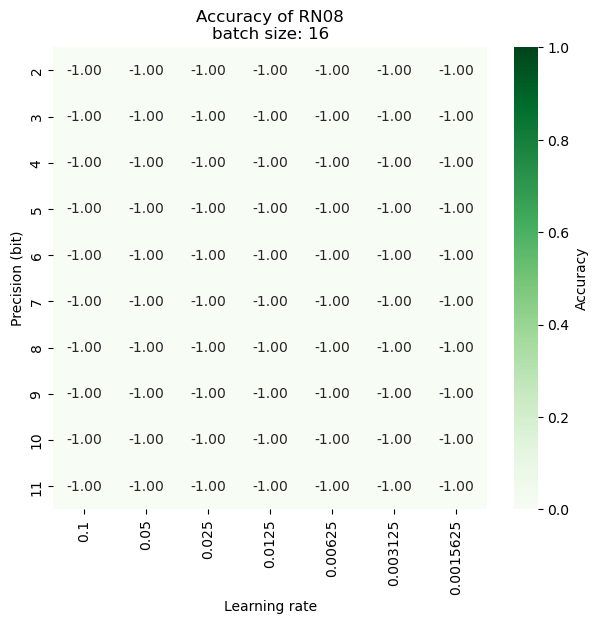

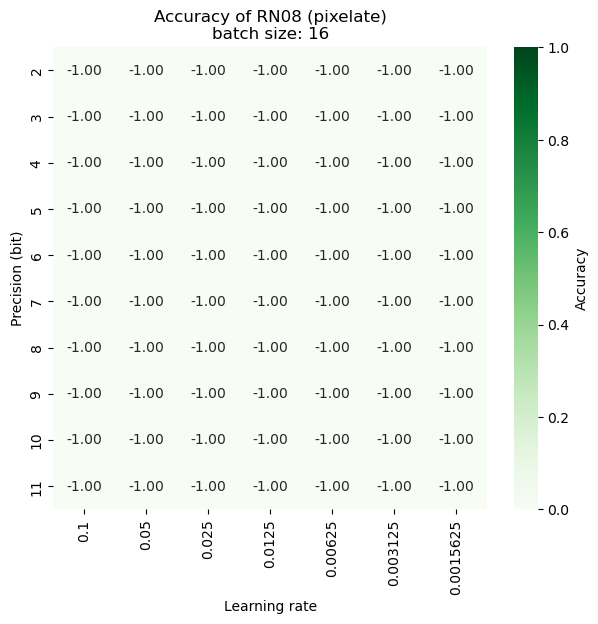

File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbald

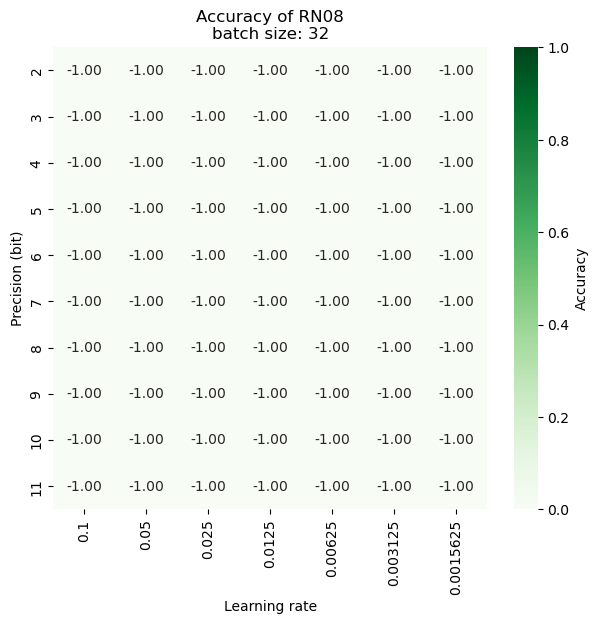

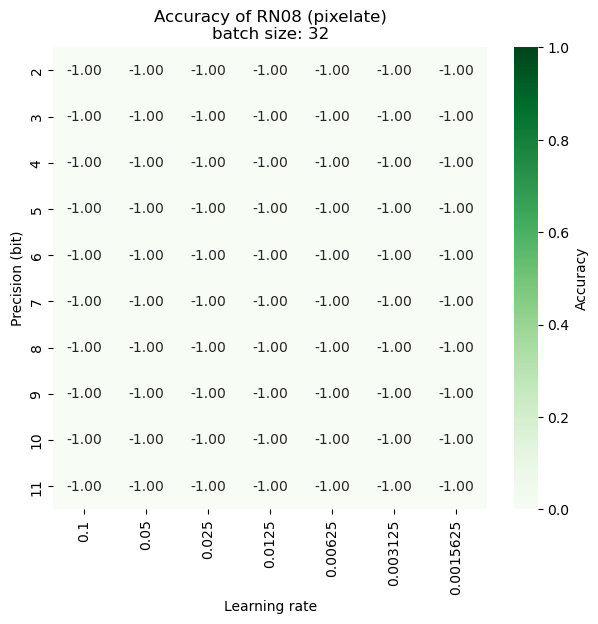

File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbald

File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! 

File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! 

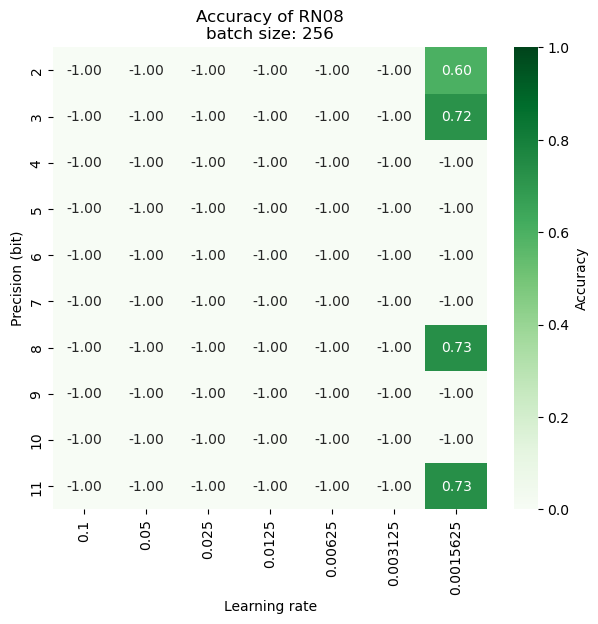

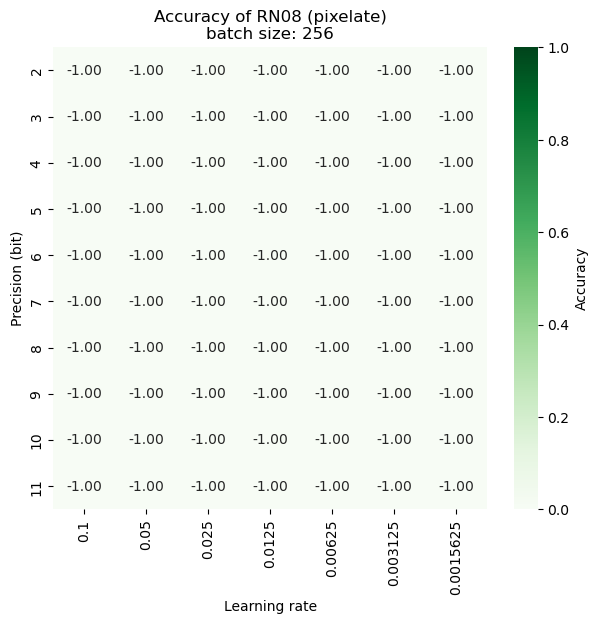

File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! 

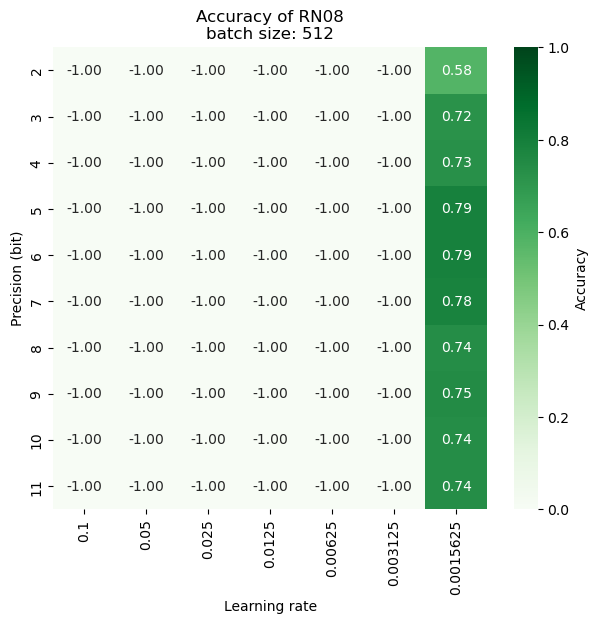

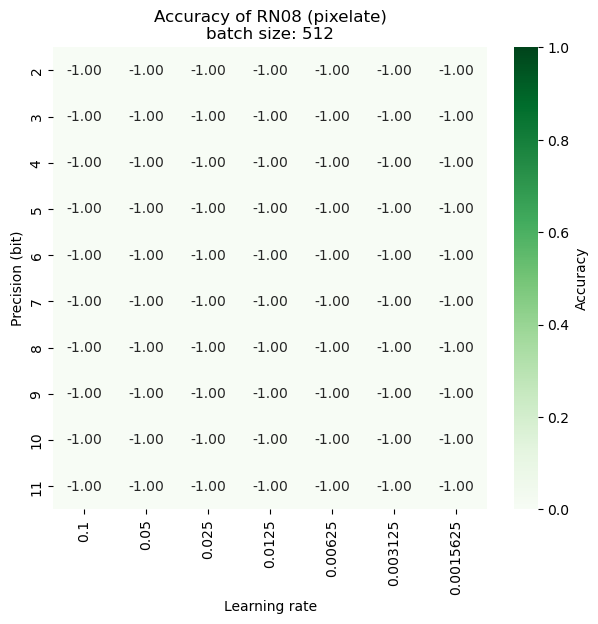

File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File

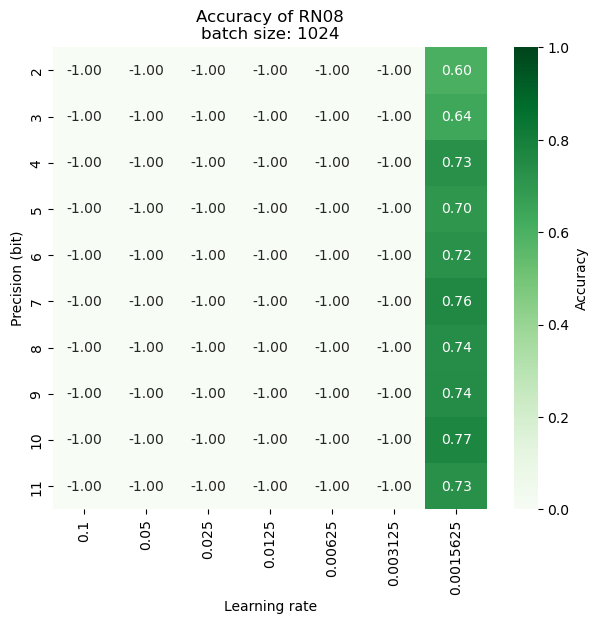

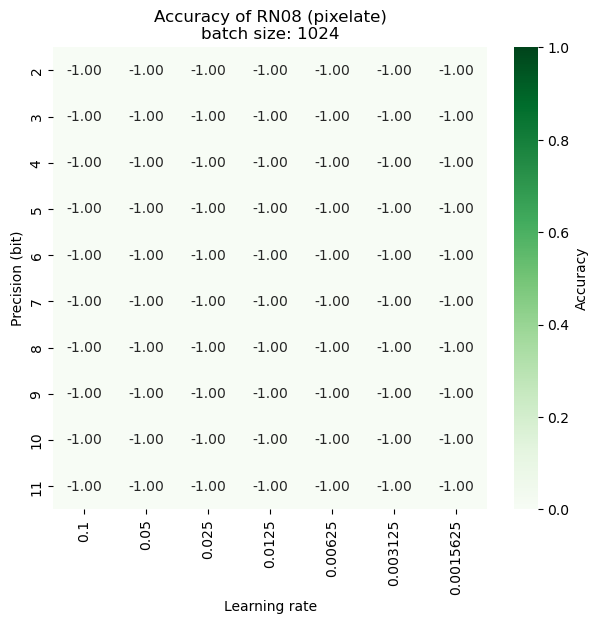

In [35]:

for bs in batch_sizes:
    matrix = np.zeros((len(precisions), len(learning_rates)))
    noise_matrix = np.zeros((len(precisions), len(learning_rates)))
    for y, lr in enumerate(learning_rates):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            # build the heatmap matrix
            matrix[x, y] = acc
            noise_matrix[x, y] = noise_acc

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=learning_rates)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=learning_rates)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nbatch size: {bs}', 
                    (0, 1),
                    'Learning rate',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='Greens')
    
    plot_2d_heatmap(noise_matrix, 
                    f'Accuracy of RN08 ({noise_type})\nbatch size: {bs}', 
                    (0, 1),
                    'Learning rate',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='Greens')

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbald

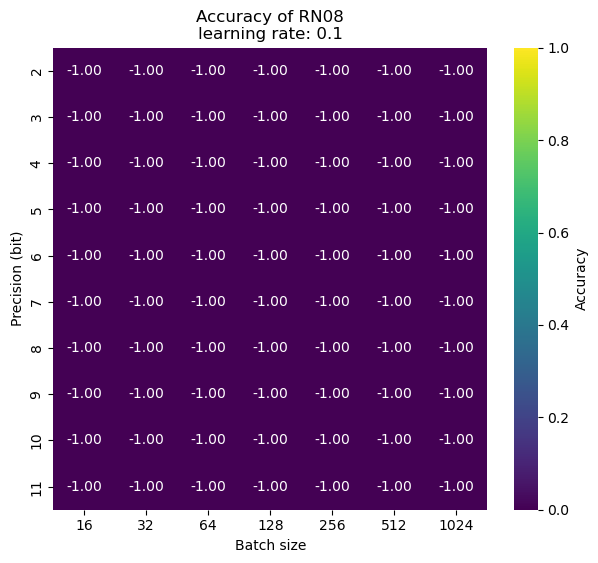

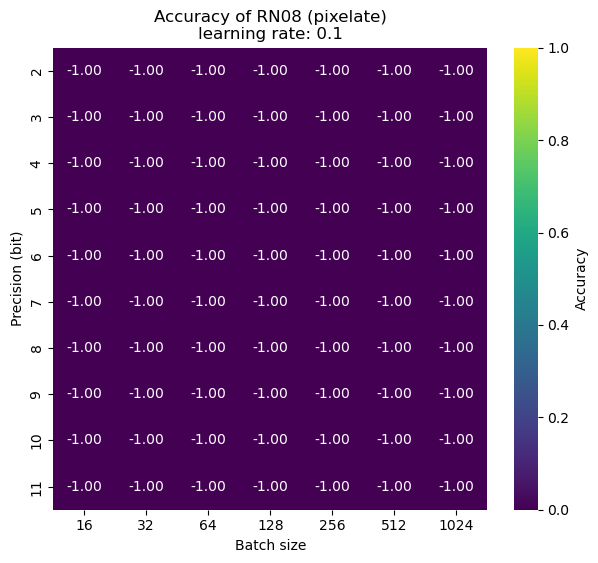

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_pixelate.txt not found!
File not found! 

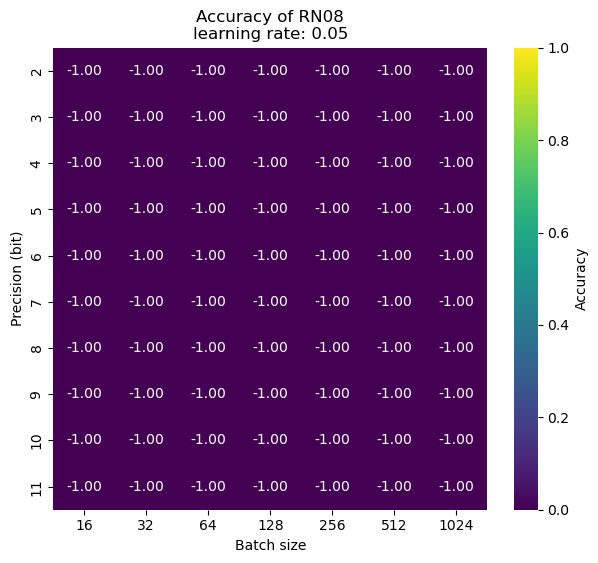

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_pixelate.txt not found!
File

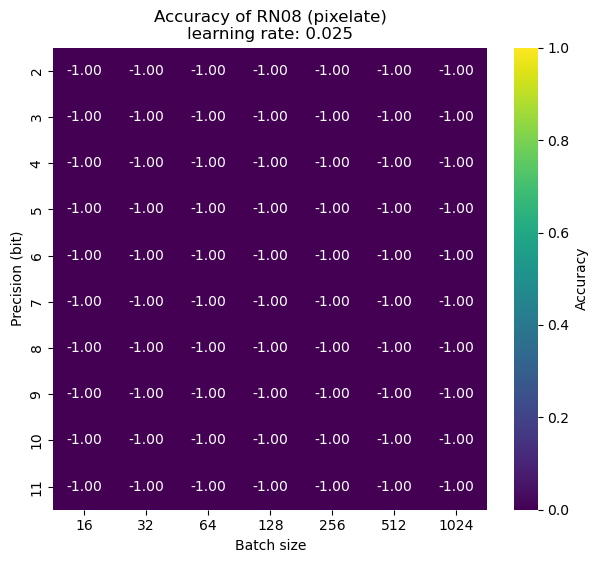

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_pixelate.txt not

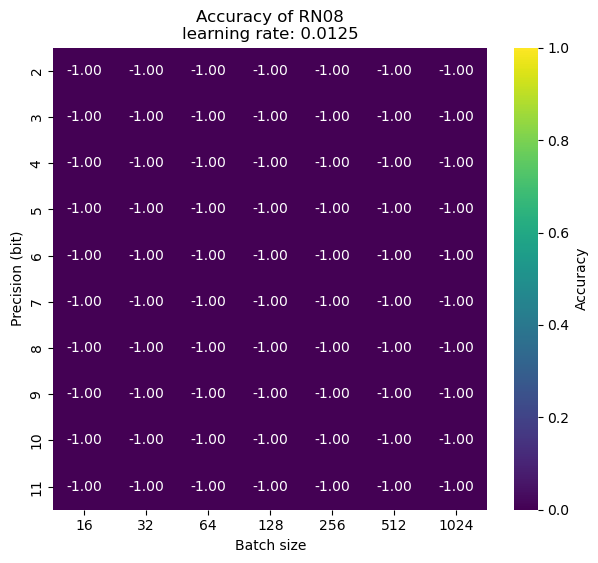

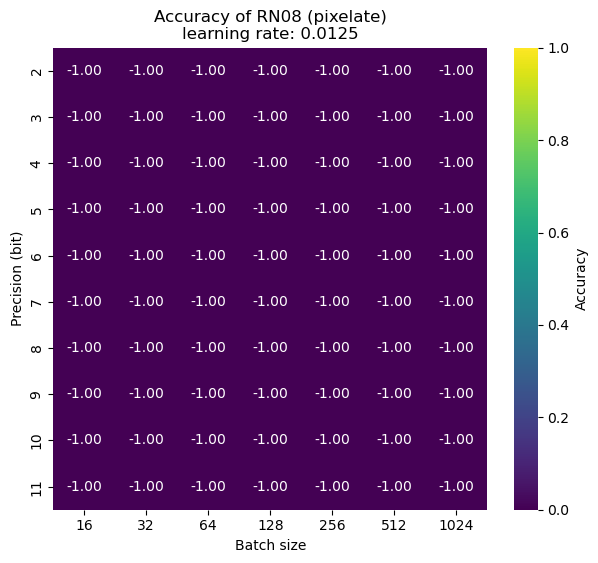

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_pixe

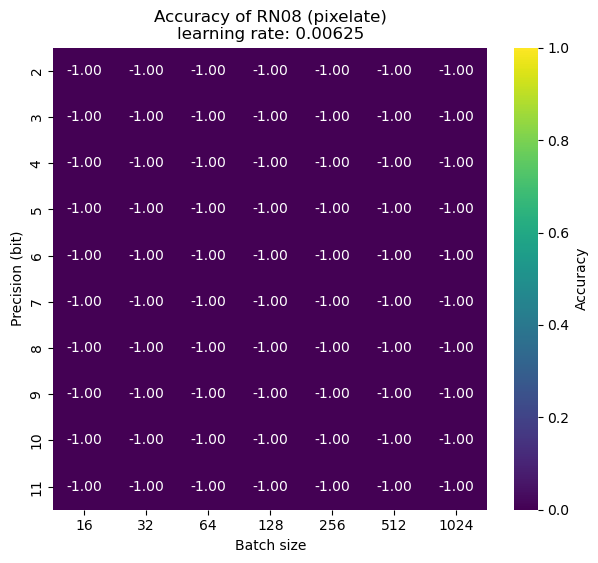

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/a

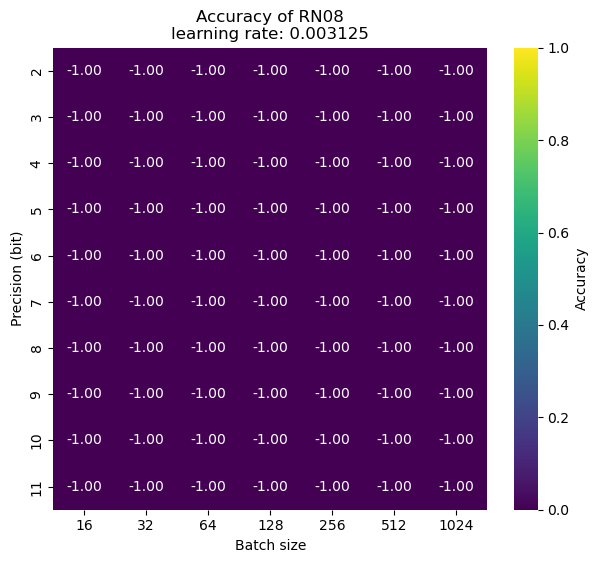

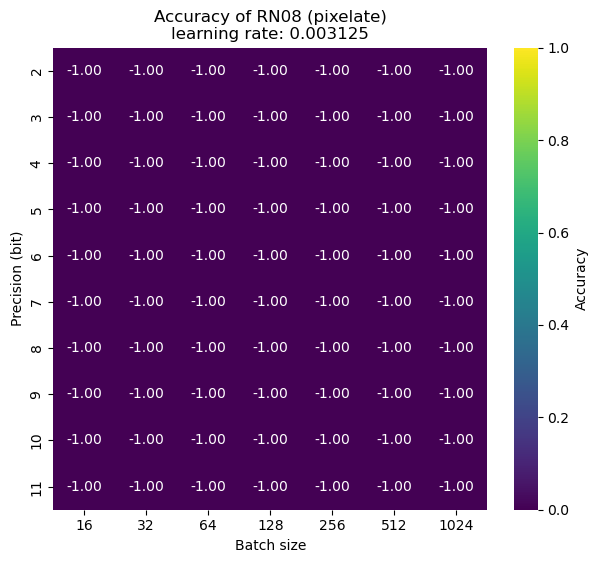

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00156

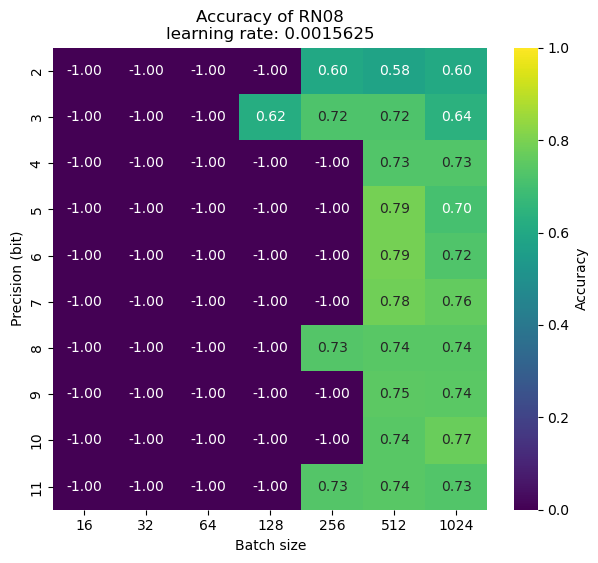

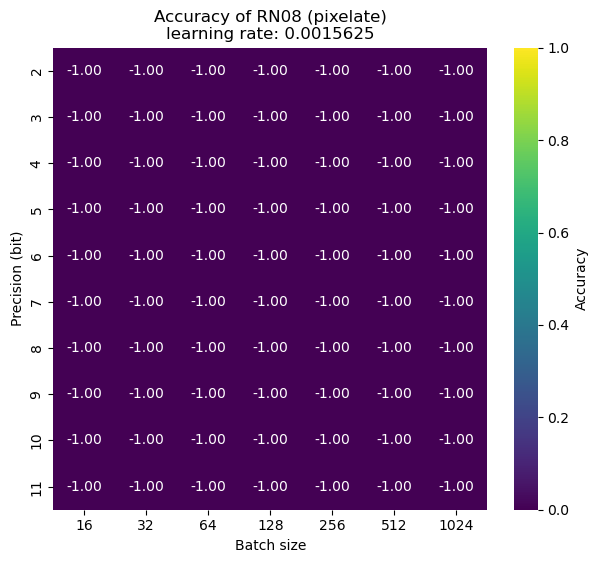

In [36]:

for lr in learning_rates:
    matrix = np.zeros((len(precisions), len(learning_rates)))
    noise_matrix = np.zeros((len(precisions), len(learning_rates)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            # build the heatmap matrix
            matrix[x, y] = acc
            noise_matrix[x, y] = noise_acc

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nlearning rate: {lr}', 
                    (0, 1),
                    'Batch size',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='viridis')
    
    plot_2d_heatmap(noise_matrix, 
                    f'Accuracy of RN08 ({noise_type})\nlearning rate: {lr}', 
                    (0, 1),
                    'Batch size',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='viridis')